In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

import data_prep

pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def categorical_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values('count', ascending = False)
    
    matplotlib.rc_file_defaults()
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])
    ax2.legend(['MeanSalesPrice'])

def ordinal_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values(group, ascending = True)
    grouped[group] = grouped[group].astype(str)
    
    
    
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])
    ax2.legend(['MeanSalesPrice'])

def plot_histogram(df, col, tgt):
    print("Correlation with target variable:", df_numeric[col].corr(df_numeric[tgt]))
    sns.histplot(data=df_numeric[col])
    plt.show()

def scatterplot(df, col, tgt):
    print("Correlation with target variable:", df_numeric[col].corr(df_numeric[tgt]))
    plt.scatter(df_numeric[col], df_numeric[tgt])
    plt.xlabel(col)
    plt.ylabel(tgt)
    plt.show()


In [3]:
fp = "data/train.csv"
df = data_prep.load_and_clean(fp)

In [4]:
df.shape

(1460, 82)

In [5]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0     8450   Pave  None      Reg   
1  2         20       RL         80.0     9600   Pave  None      Reg   
2  3         60       RL         68.0    11250   Pave  None      IR1   
3  4         70       RL         60.0     9550   Pave  None      IR1   
4  5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         None     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1         None     Gable  CompShg     MetalSd     MetalSd       None   
2         2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3         1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4         None     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ    

In [6]:
df[df.isnull().any(axis=1)].head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7    8         60       RL          NaN    10382   Pave  None      IR1   
12  13         20       RL          NaN    12968   Pave  None      IR2   
14  15         20       RL          NaN    10920   Pave  None      IR1   
16  17         20       RL          NaN    11241   Pave  None      IR1   
24  25         20       RL          NaN     8246   Pave  None      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
24         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
7        Norm     1Fam     2Story            7            6       1973   
12       Norm     1Fam     1Story            5            6       1962   
14       Norm     1Fam     1Story            6            5       1960   
16       Norm     1Fam     1Story            6            7       1970   
24       Norm     1Fam     1Story            5            8       1968   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
7          None     Gable  CompShg     HdBoard     HdBoard      Stone   
12         None       Hip  CompShg     HdBoard     Plywood       None   
14         None       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16         None     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
24         2001     Gable  CompShg     Plywood     Plywood       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
7        240.0        TA        TA     CBlock       Gd       TA           Mn   
12         0.0        TA        TA     CBlock       TA       TA           No   
14       212.0        TA        TA     CBlock       TA       TA           No   
16       180.0        TA        TA     CBlock       TA       TA           No   
24         0.0        TA        Gd     CBlock       TA       TA           Mn   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
7           ALQ         859          BLQ          32        216         1107   
12          ALQ         737          Unf           0        175          912   
14          BLQ         733          Unf           0        520         1253   
16          ALQ         578          Unf           0        426         1004   
24          Rec         188          ALQ         668        204         1060   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
7     GasA        Ex          Y      SBrkr      1107       983             0   
12    GasA        TA          Y      SBrkr       912         0             0   
14    GasA        TA          Y      SBrkr      1253         0             0   
16    GasA        Ex          Y      SBrkr      1004         0             0   
24    GasA        Ex          Y      SBrkr      1060         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
7        2090             1             0         2         1             3   
12        912             1             0         1         0             2   
14       1253             1             0         1         1             2   
16       1004             1             0         1         0             2   
24       1060             1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
7              1          TA             7        Typ           2          TA   
12             1          TA             4        Typ           0        None   
14             1          TA             5        Typ           1          Fa   


In [7]:
df.isnull().any(axis=0).values

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

# Correlation Table

<Axes: >

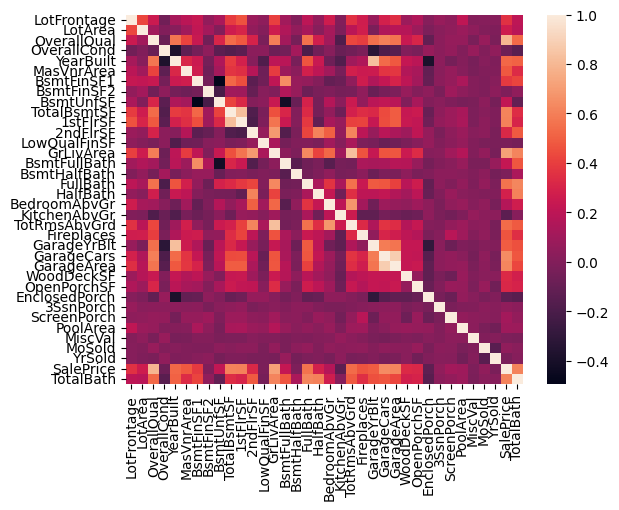

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
corr = df_numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Numerics

In [9]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'TotalBath'],
      dtype='object')

Correlation with target variable: 0.3517990965706778


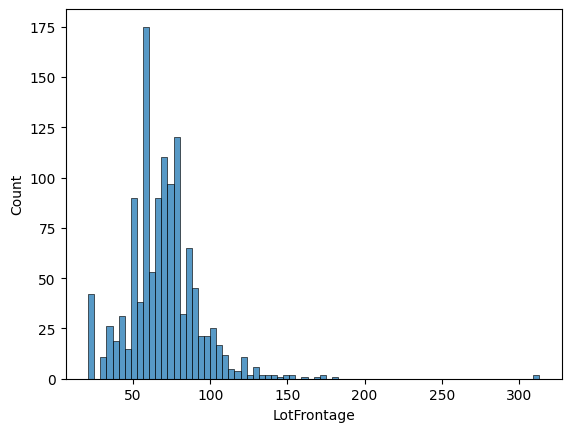

In [10]:
tgt = 'SalePrice'
col = 'LotFrontage'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3517990965706778


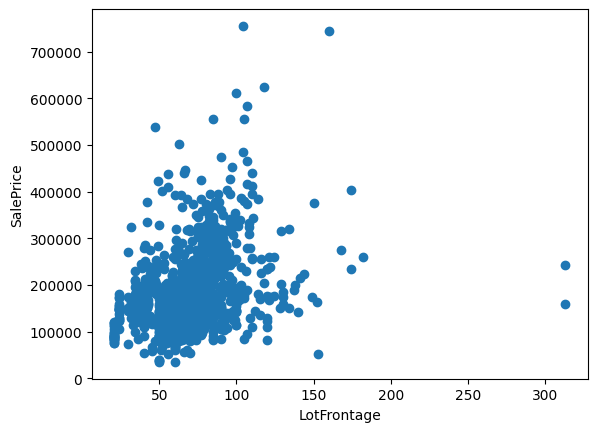

In [11]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.2638433538714056


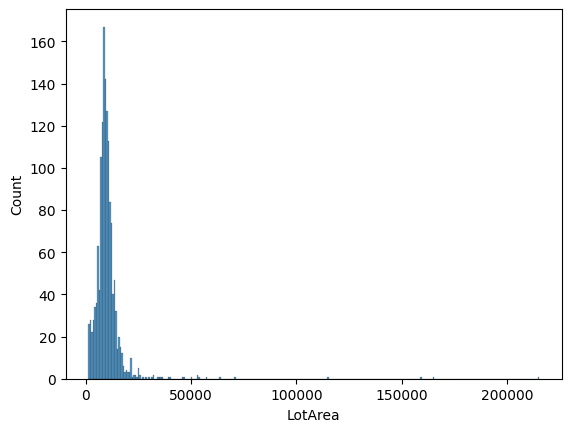

In [12]:
col = 'LotArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.2638433538714056


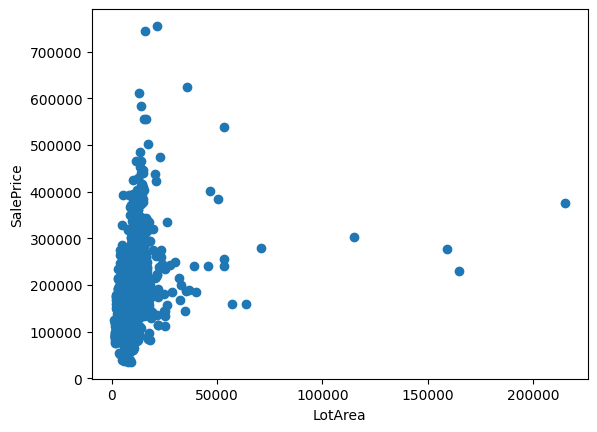

In [13]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.4774930470957156


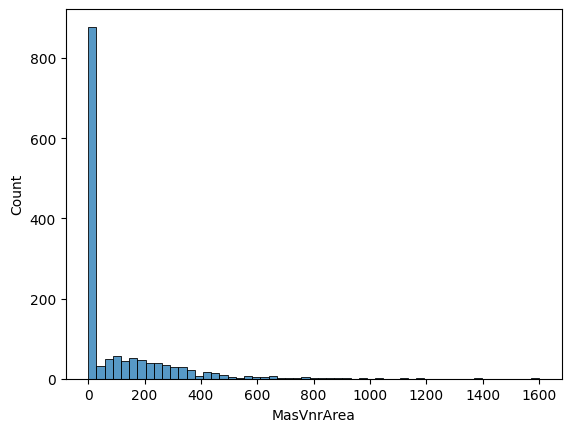

In [14]:
col = 'MasVnrArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.4774930470957156


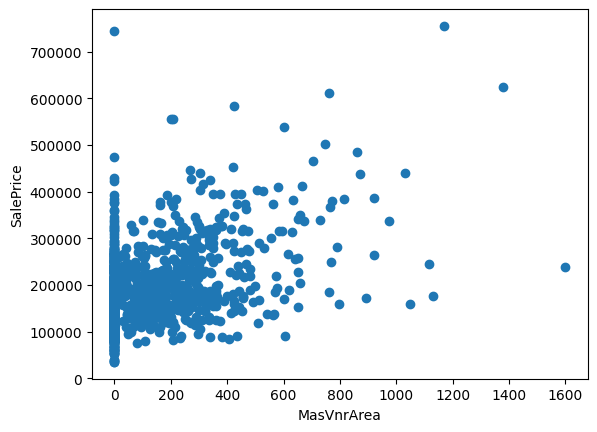

In [15]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.3864198062421533


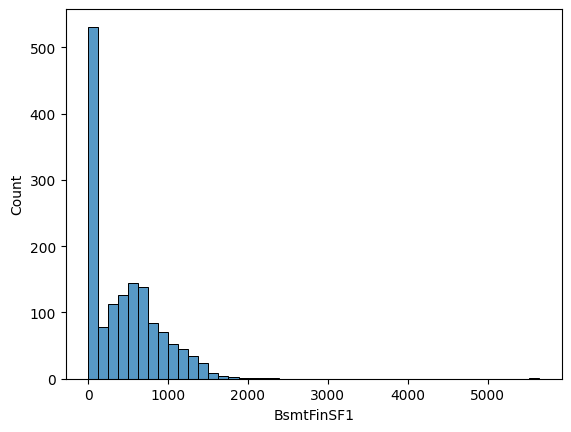

In [16]:
col = 'BsmtFinSF1'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3864198062421533


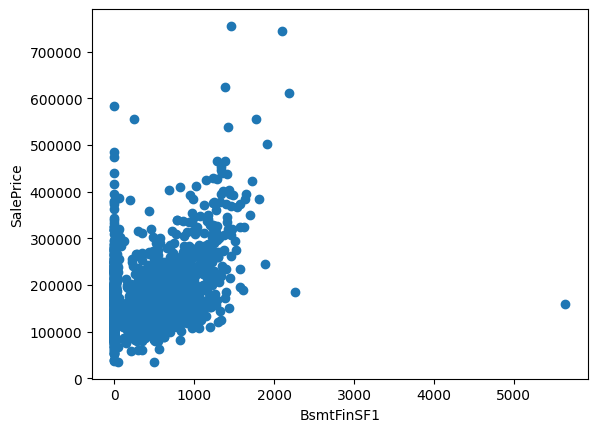

In [17]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.011378121450215144


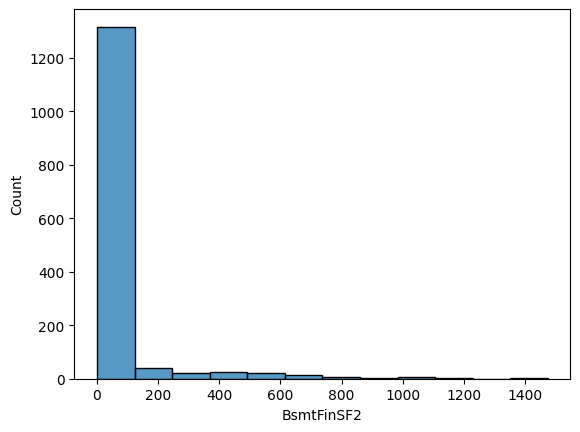

In [18]:
col = 'BsmtFinSF2'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.011378121450215144


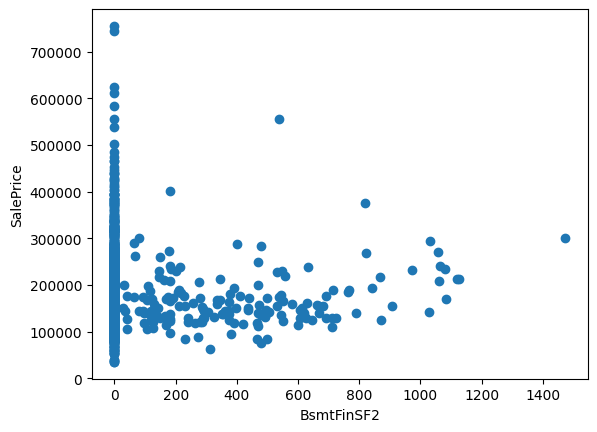

In [19]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.21447910554696892


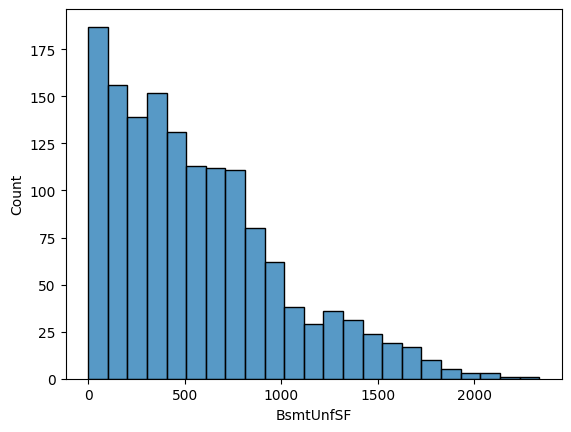

In [20]:
col = 'BsmtUnfSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6135805515591953


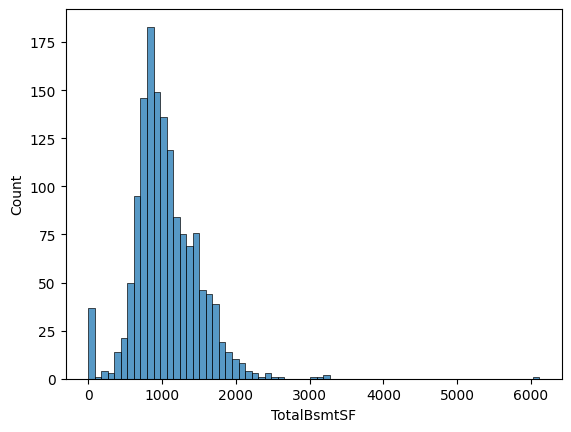

In [21]:
col = 'TotalBsmtSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6135805515591953


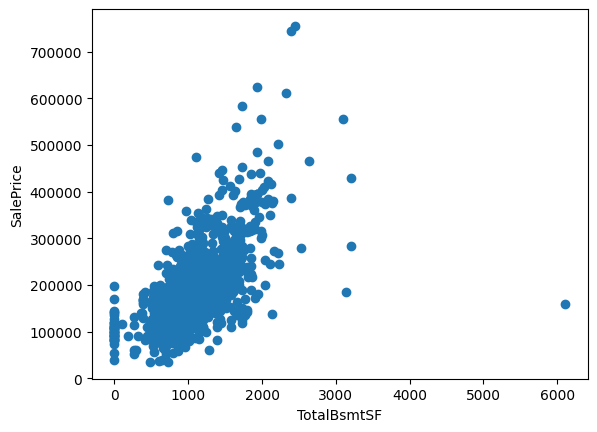

In [22]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.6058521846919149


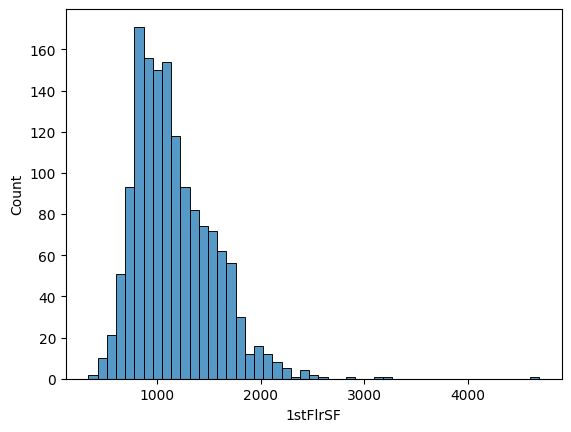

In [23]:
col = '1stFlrSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6058521846919149


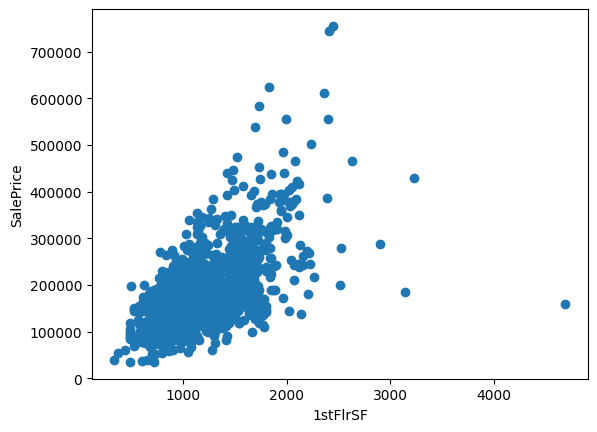

In [24]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.31933380283206786


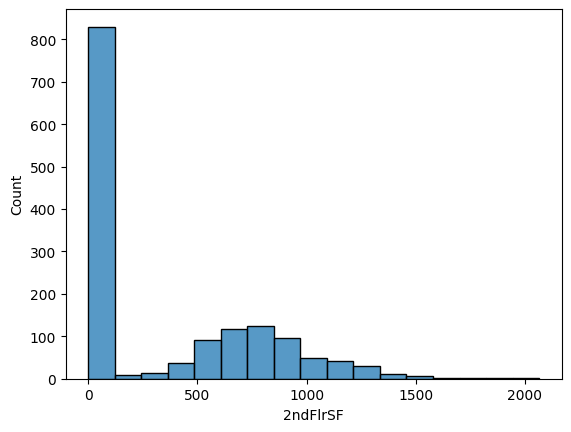

In [25]:
col = '2ndFlrSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.31933380283206786


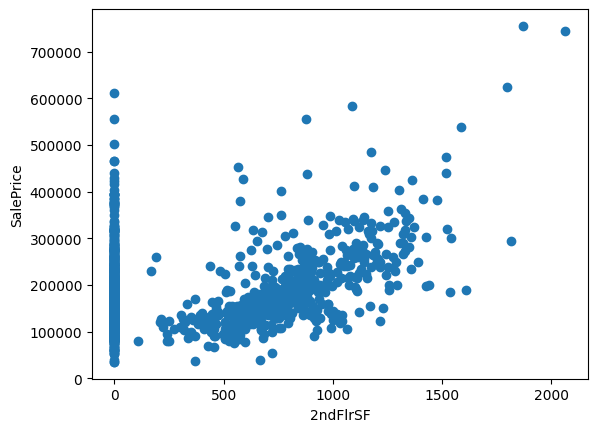

In [26]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.025606130000679538


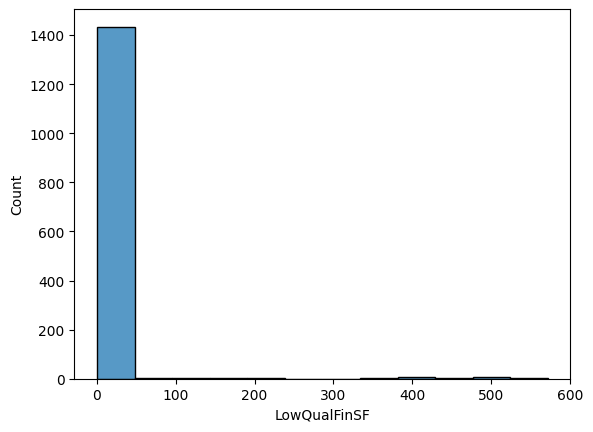

In [27]:
col = 'LowQualFinSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.025606130000679538


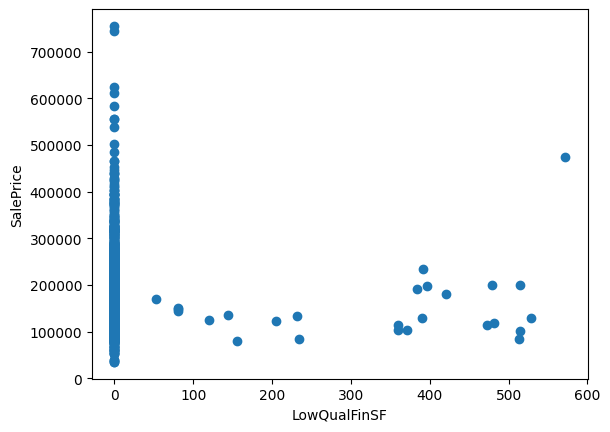

In [28]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.7086244776126523


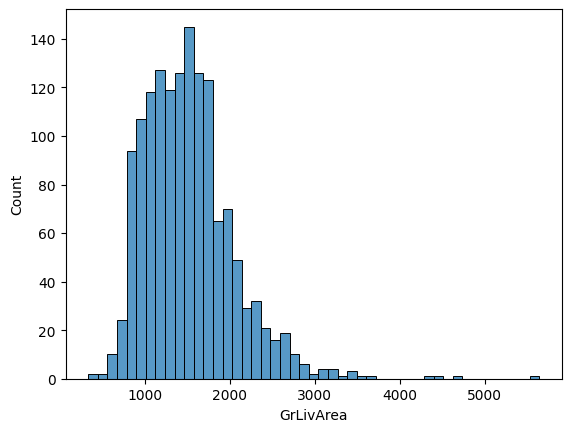

In [29]:
col = 'GrLivArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.7086244776126523


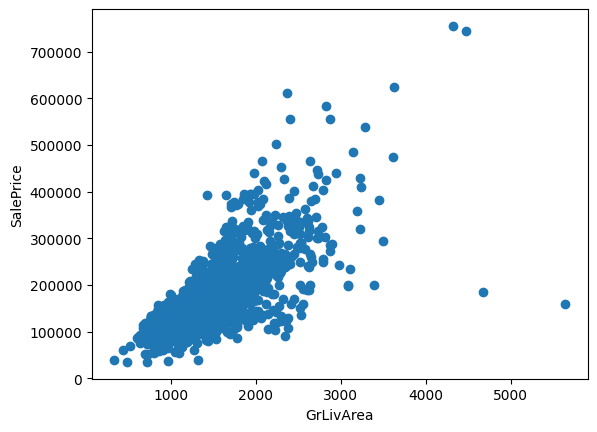

In [30]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.6234314389183618


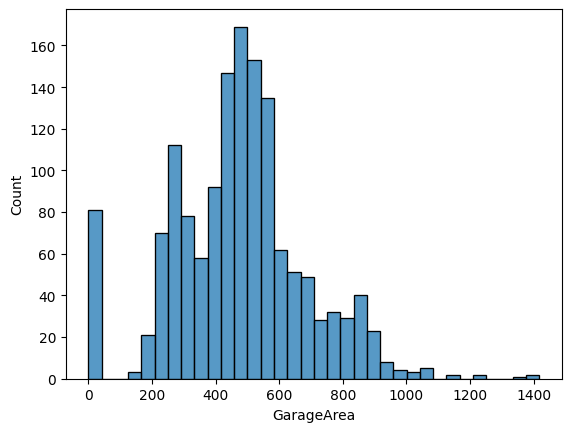

In [31]:
col = 'GarageArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6234314389183618


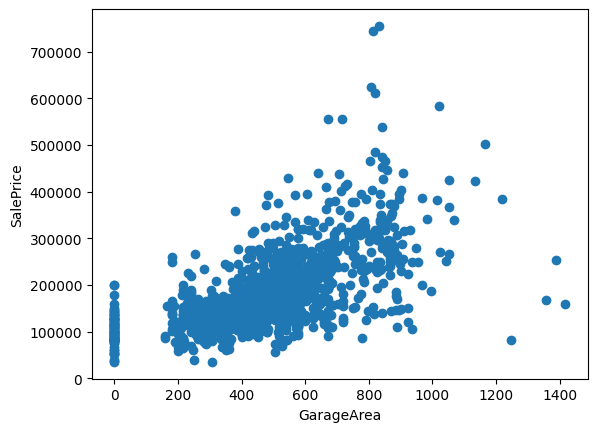

In [32]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.3244134445681298


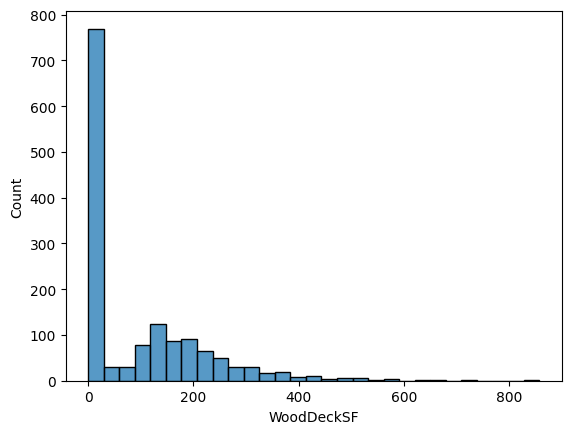

In [33]:
col = 'WoodDeckSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3244134445681298


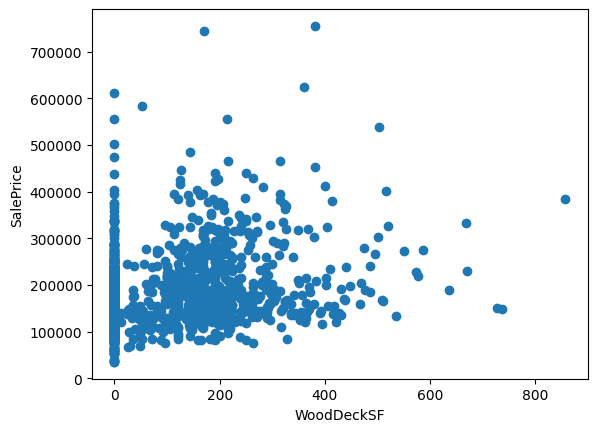

In [34]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.31585622711605527


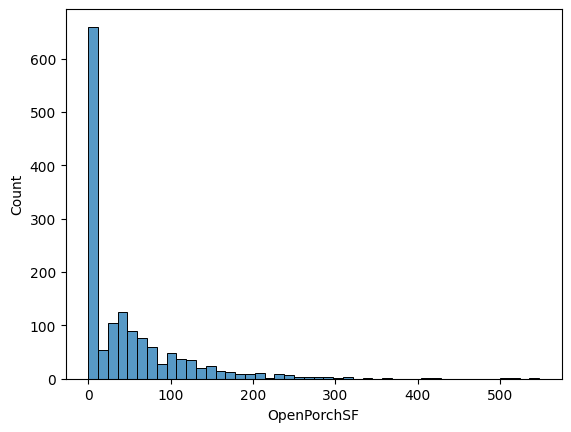

In [35]:
col = 'OpenPorchSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.31585622711605527


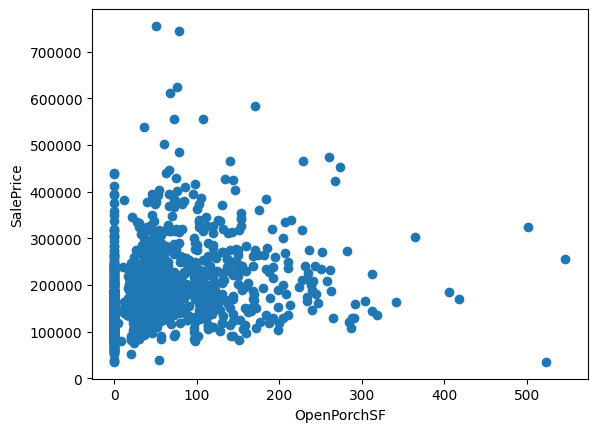

In [36]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.12857795792595678


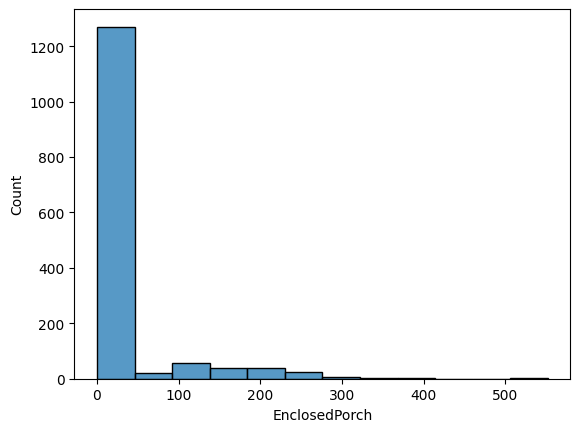

In [37]:
col = 'EnclosedPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.12857795792595678


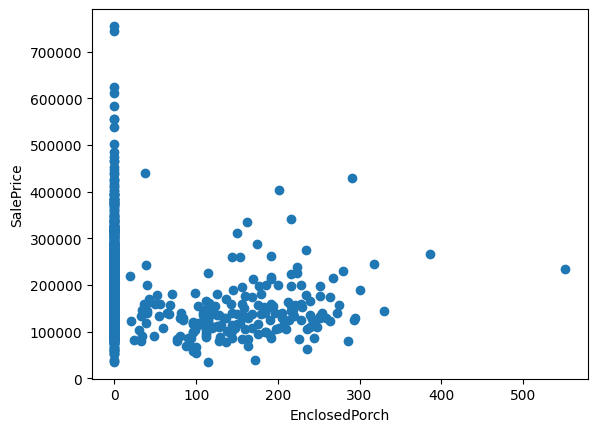

In [38]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.04458366533574841


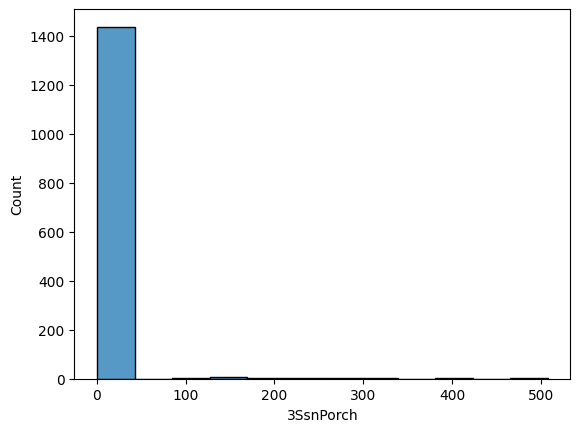

In [39]:
col = '3SsnPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.04458366533574841


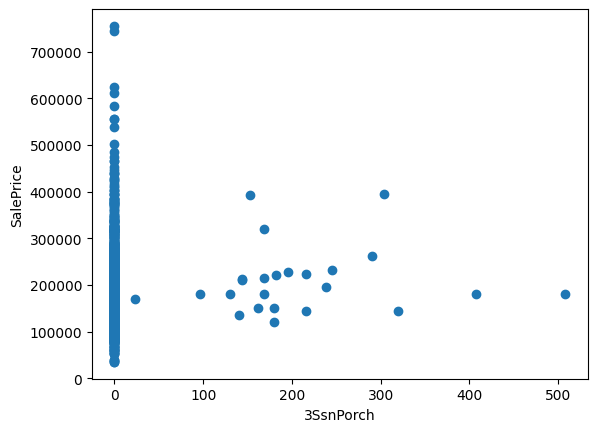

In [40]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.1114465711429112


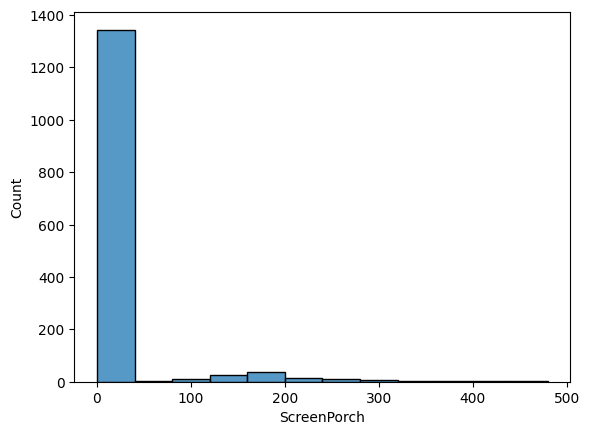

In [41]:
col = 'ScreenPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.1114465711429112


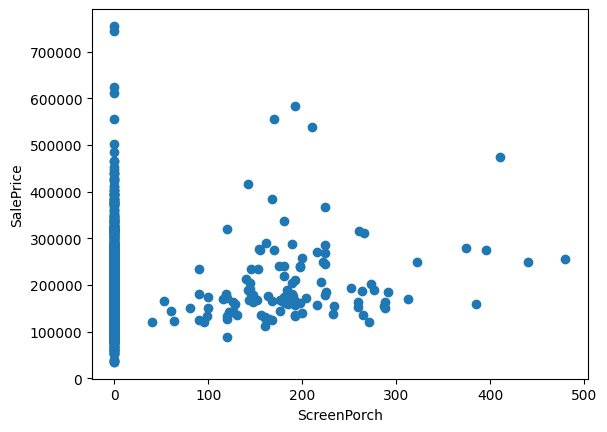

In [42]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.09240354949187322


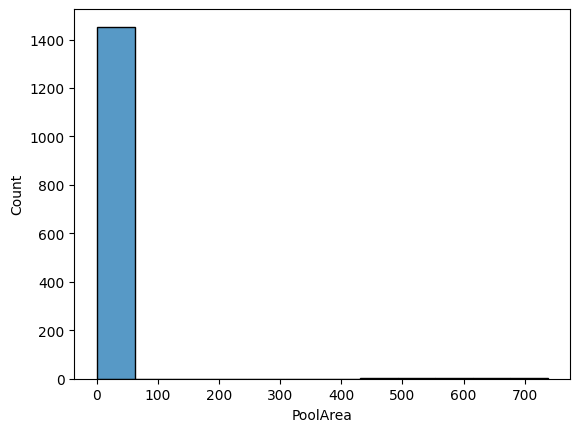

In [43]:
col = 'PoolArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.09240354949187322


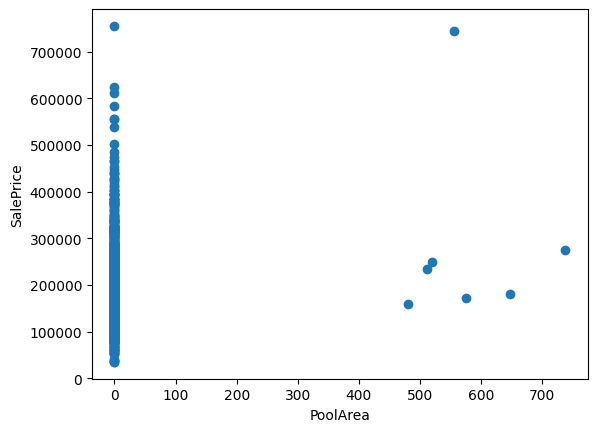

In [44]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.021189579640303262


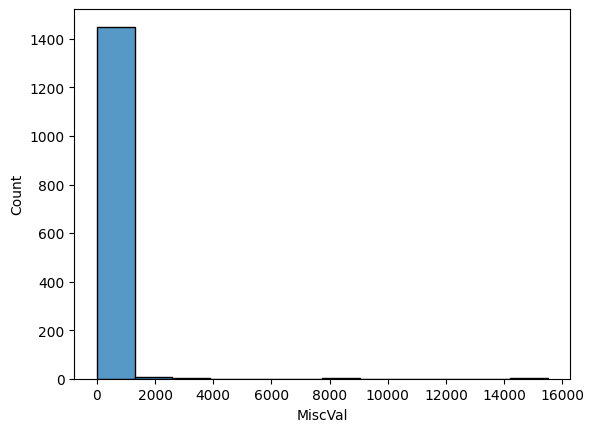

In [45]:
col = 'MiscVal'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.021189579640303262


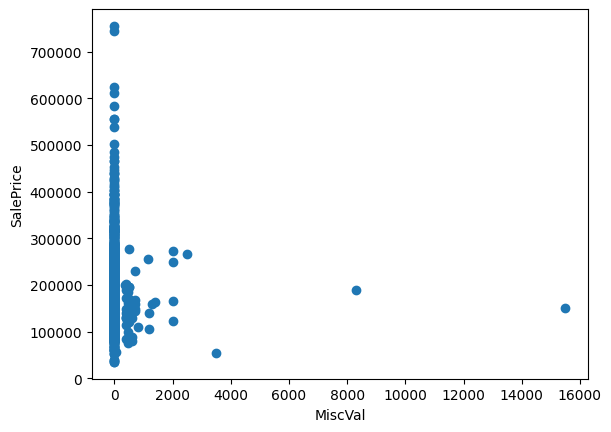

In [46]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 1.0


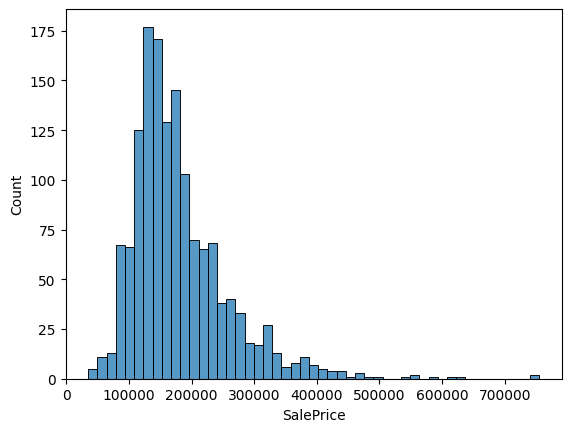

In [47]:
col = 'SalePrice'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 1.0


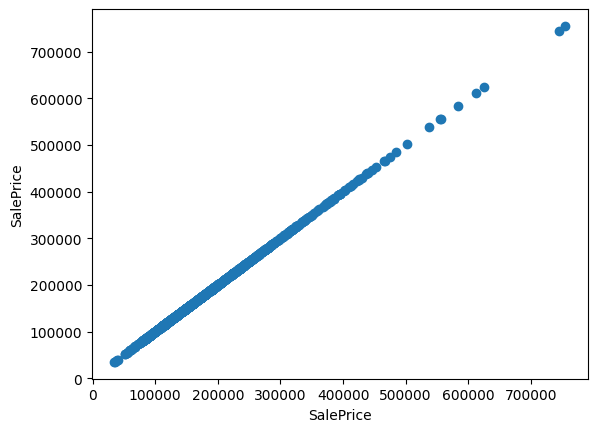

In [48]:
scatterplot(df_numeric, col, tgt)

# Ordinals

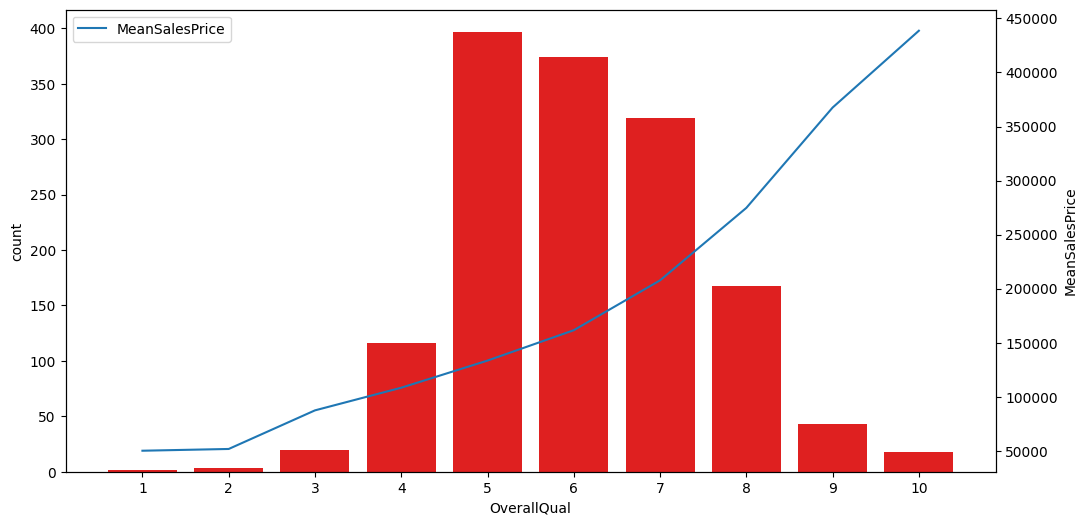

In [49]:
group = 'OverallQual'
ordinal_plot(df, group)

Correlation with target variable: 0.790981600583805


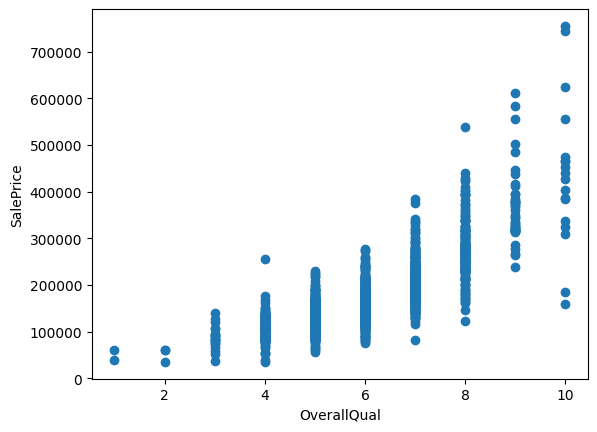

In [50]:
scatterplot(df, group, tgt)

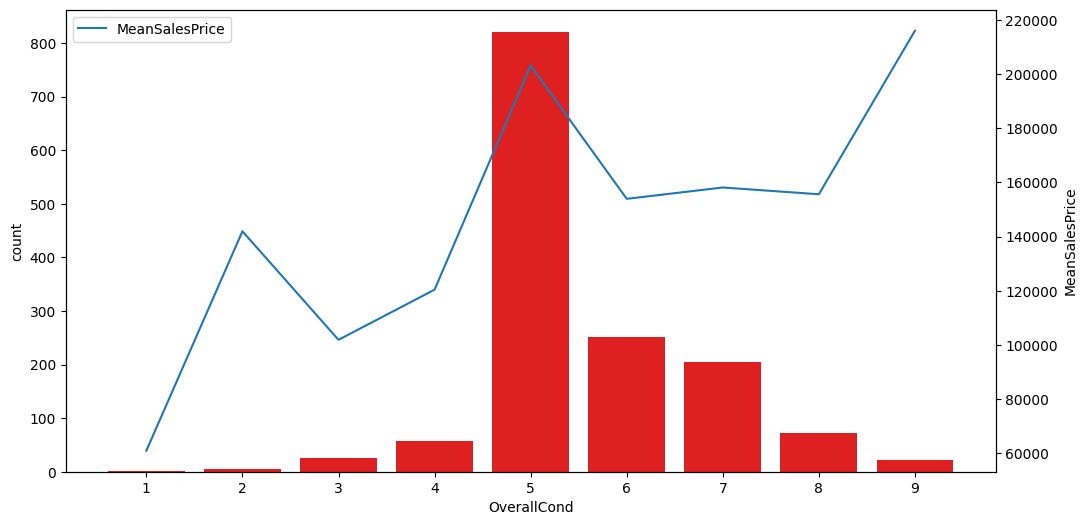

In [51]:
group = 'OverallCond'
ordinal_plot(df, group)

Correlation with target variable: -0.07785589404867806


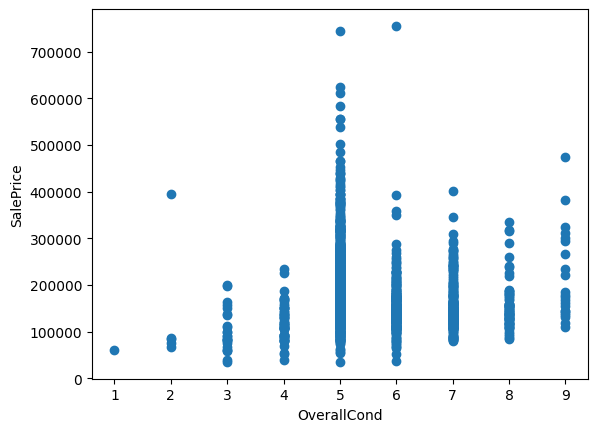

In [52]:
scatterplot(df, group, tgt)

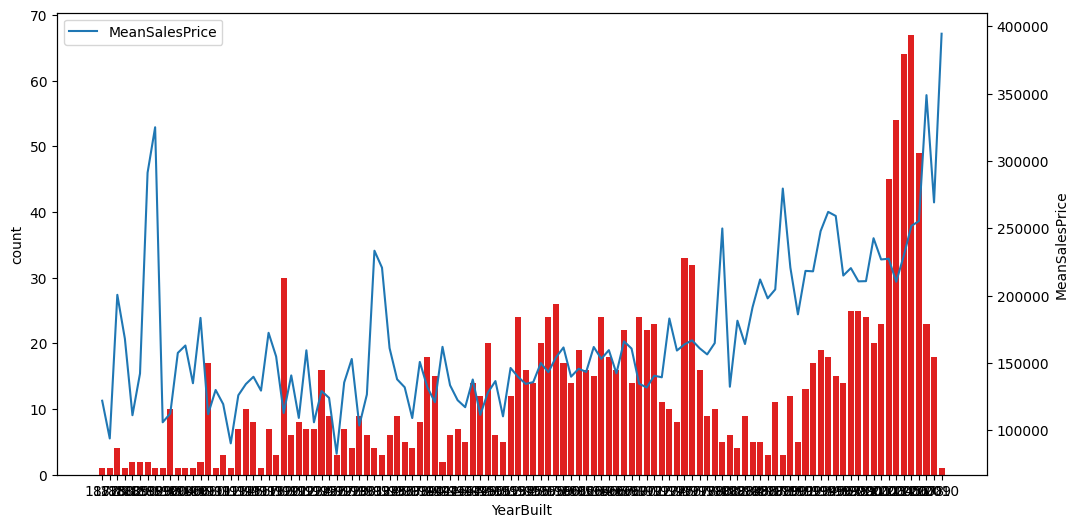

In [53]:
group = 'YearBuilt'
ordinal_plot(df, group)

Correlation with target variable: 0.5228973328794971


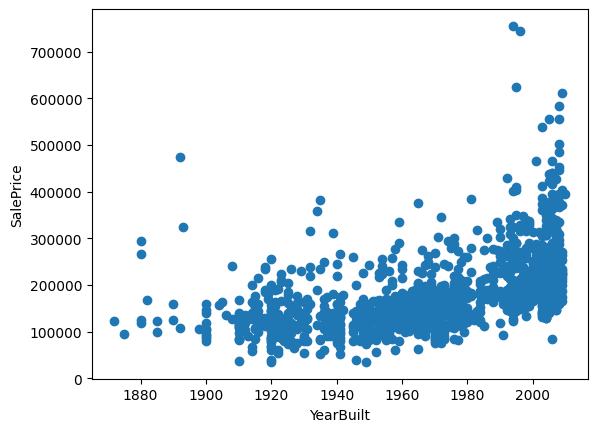

In [54]:
scatterplot(df, group, tgt)

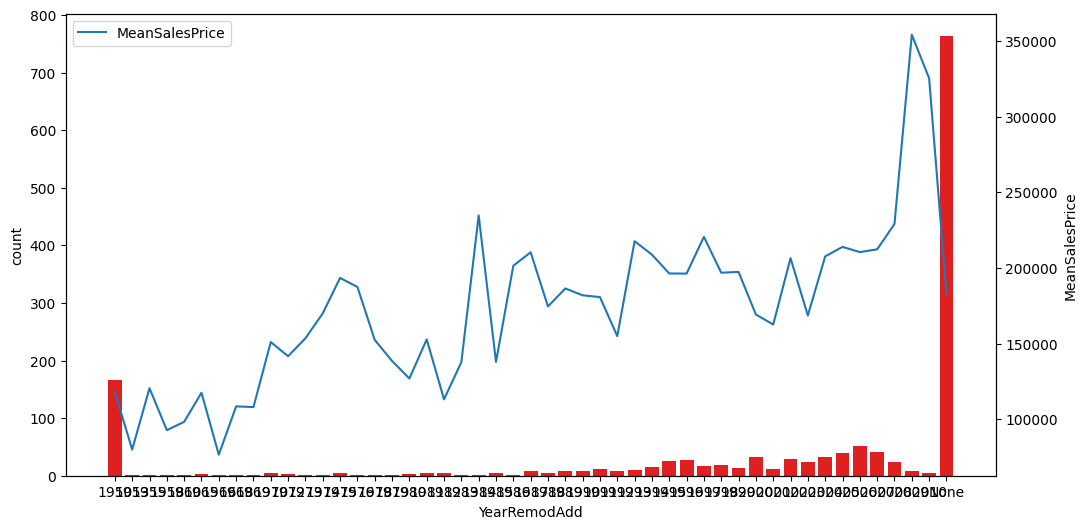

In [55]:
group = 'YearRemodAdd'
ordinal_plot(df, group)

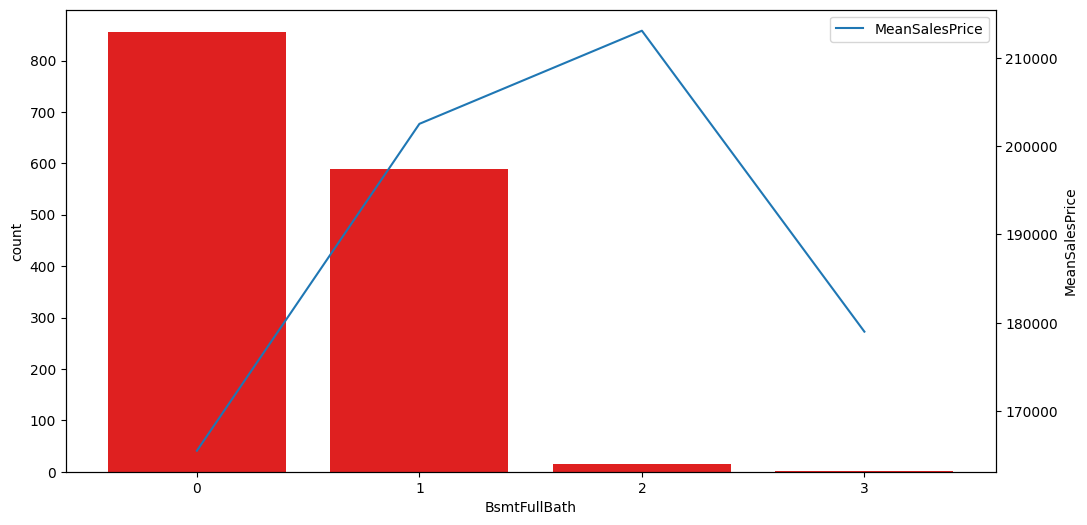

In [56]:
group = 'BsmtFullBath'
ordinal_plot(df, group)

Correlation with target variable: 0.22712223313149427


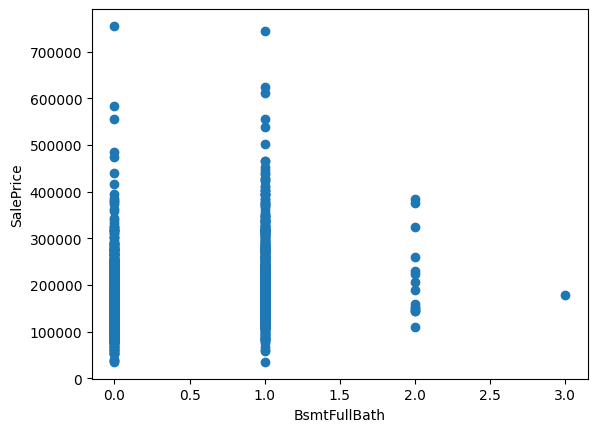

In [57]:
scatterplot(df, group, tgt)

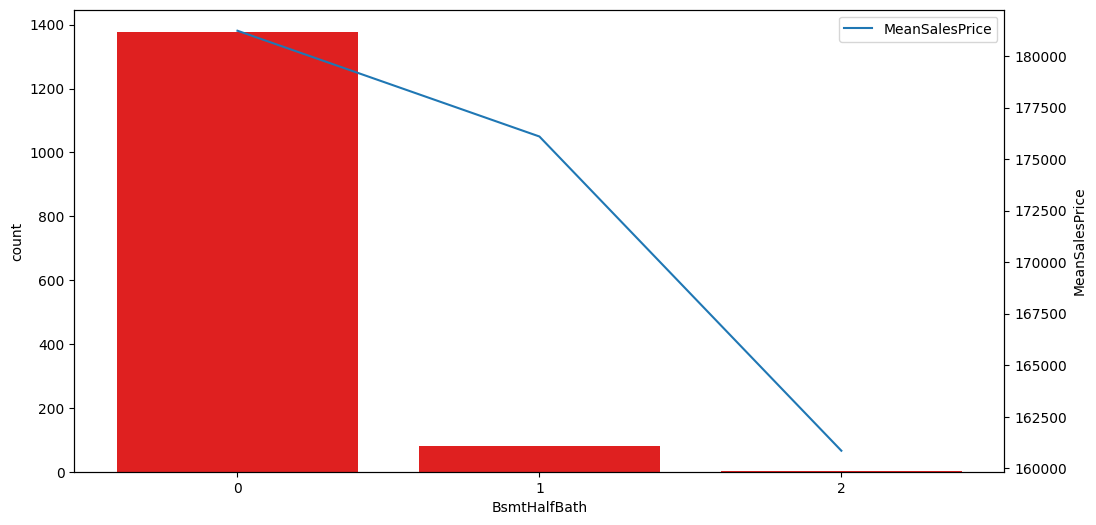

In [58]:
group = 'BsmtHalfBath'
ordinal_plot(df, group)

Correlation with target variable: -0.016844154297359016


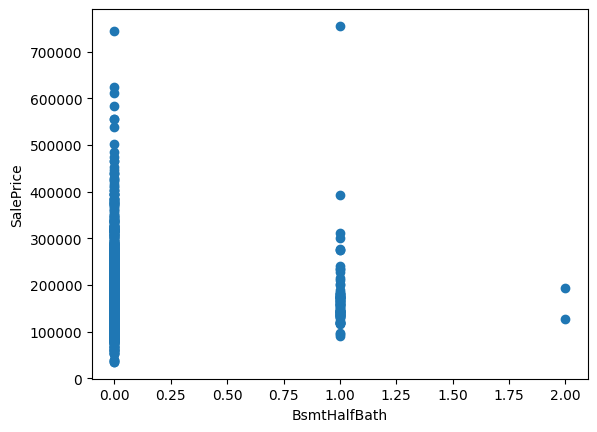

In [59]:
scatterplot(df, group, tgt)

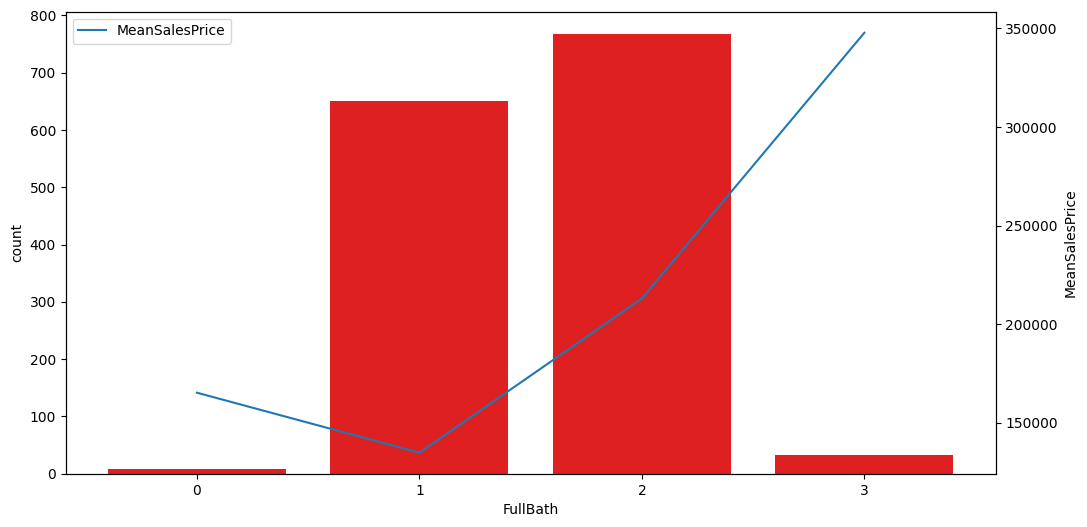

In [60]:
group = 'FullBath'
ordinal_plot(df, group)

Correlation with target variable: 0.5606637627484461


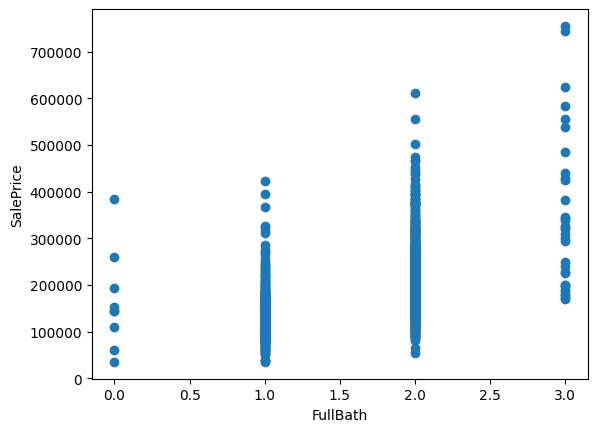

In [61]:
scatterplot(df, group, tgt)

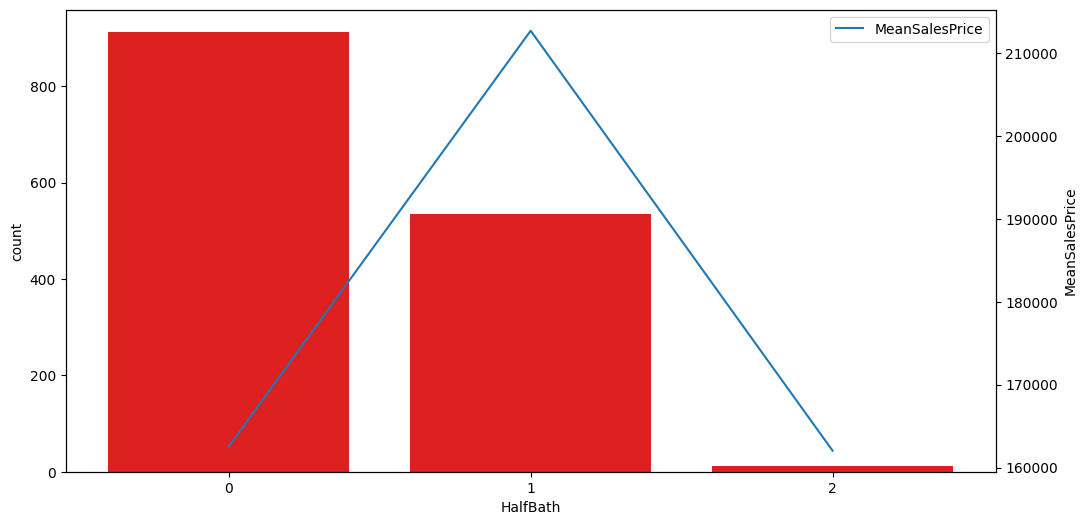

In [62]:
group = 'HalfBath'
ordinal_plot(df, group)

Correlation with target variable: 0.28410767559478267


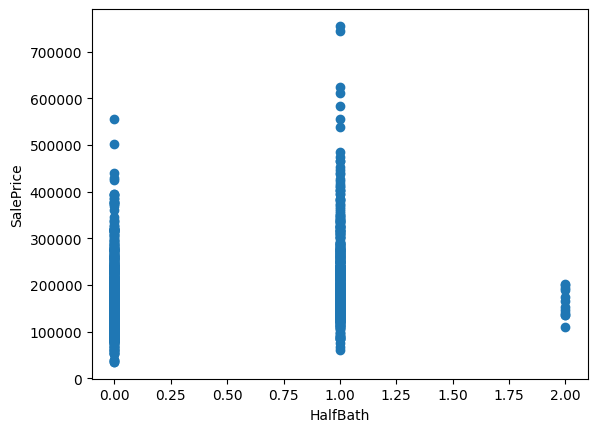

In [63]:
scatterplot(df, group, tgt)

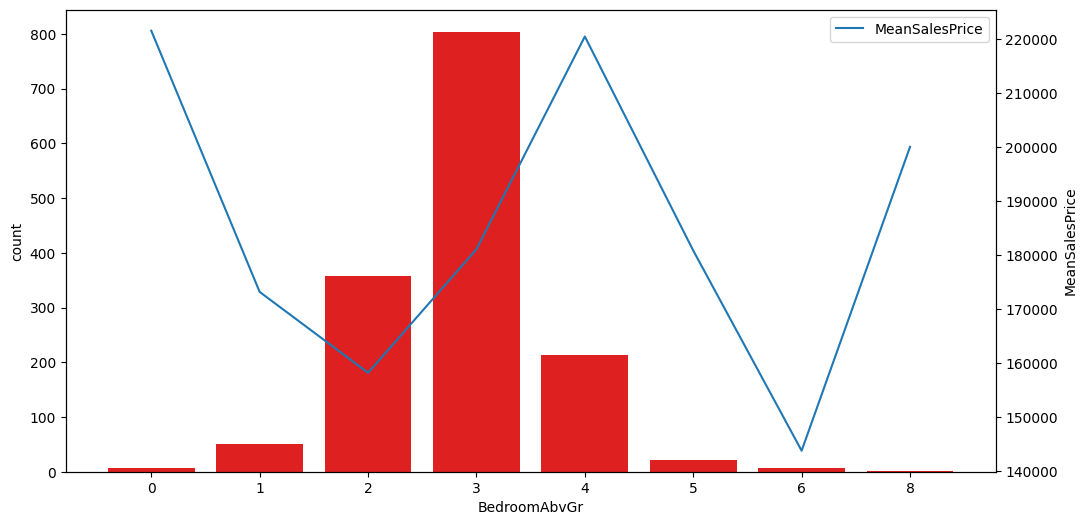

In [64]:
group = 'BedroomAbvGr'
ordinal_plot(df, group)

Correlation with target variable: 0.16821315430074005


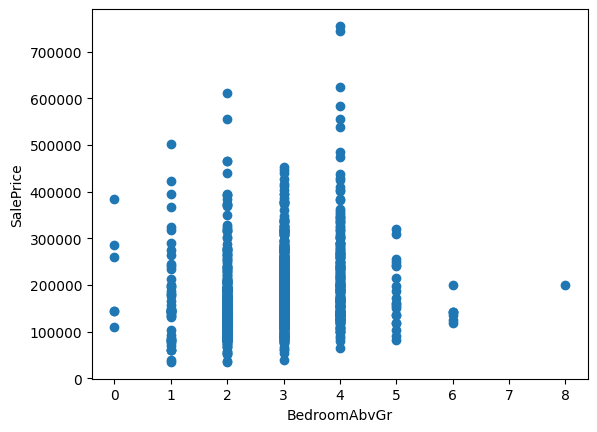

In [65]:
scatterplot(df, group, tgt)

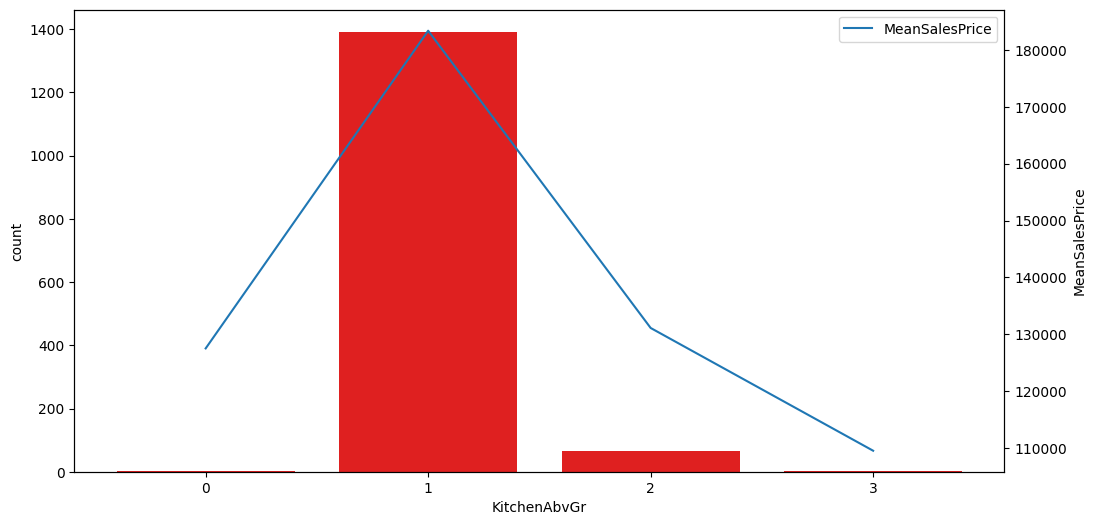

In [66]:
group = 'KitchenAbvGr'
ordinal_plot(df, group)

Correlation with target variable: -0.13590737084214125


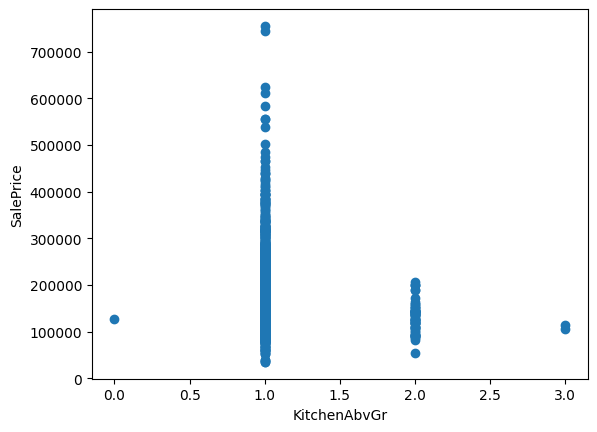

In [67]:
scatterplot(df, group, tgt)

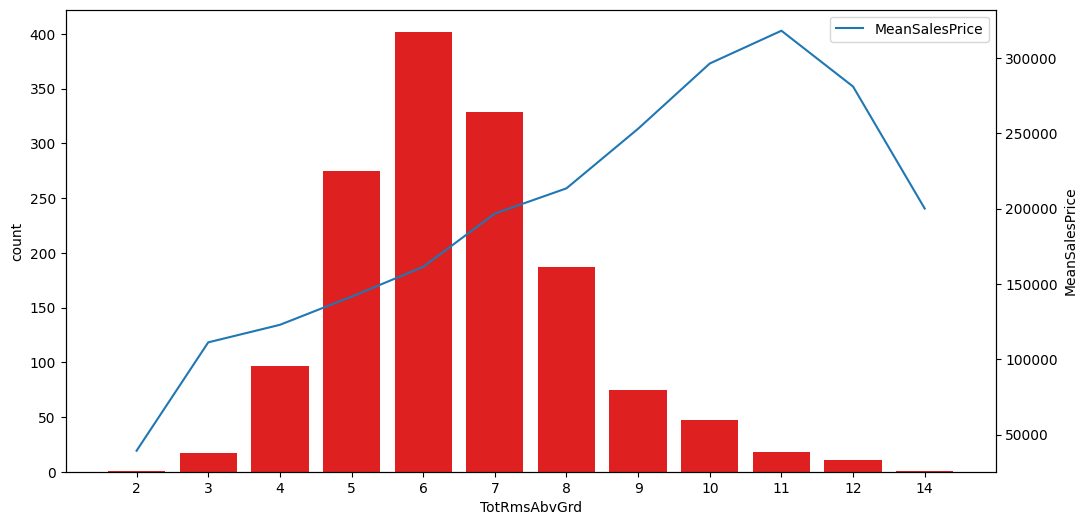

In [68]:
group = 'TotRmsAbvGrd'
ordinal_plot(df, group)

Correlation with target variable: 0.5337231555820283


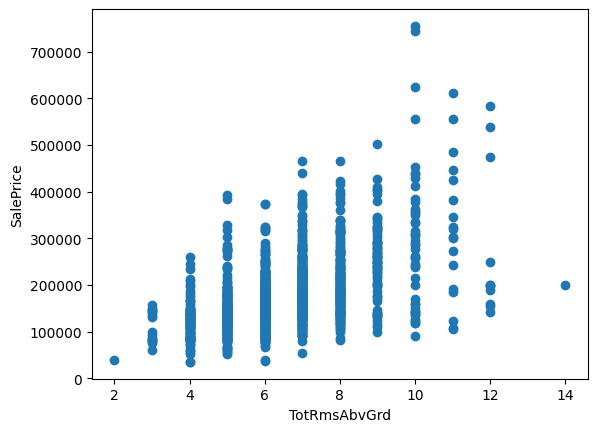

In [69]:
scatterplot(df, group, tgt)

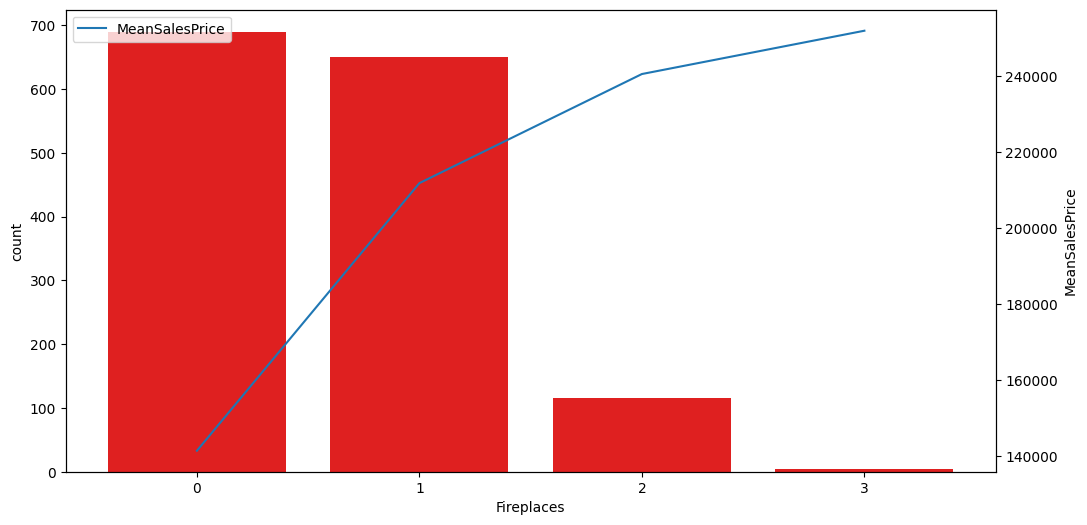

In [70]:
group = 'Fireplaces'
ordinal_plot(df, group)

Correlation with target variable: 0.4669288367515278


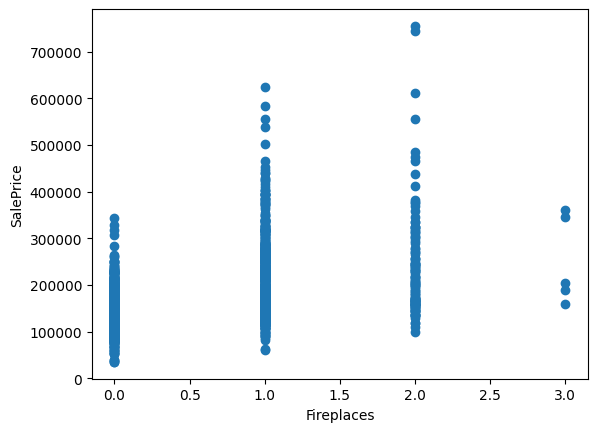

In [71]:
scatterplot(df, group, tgt)

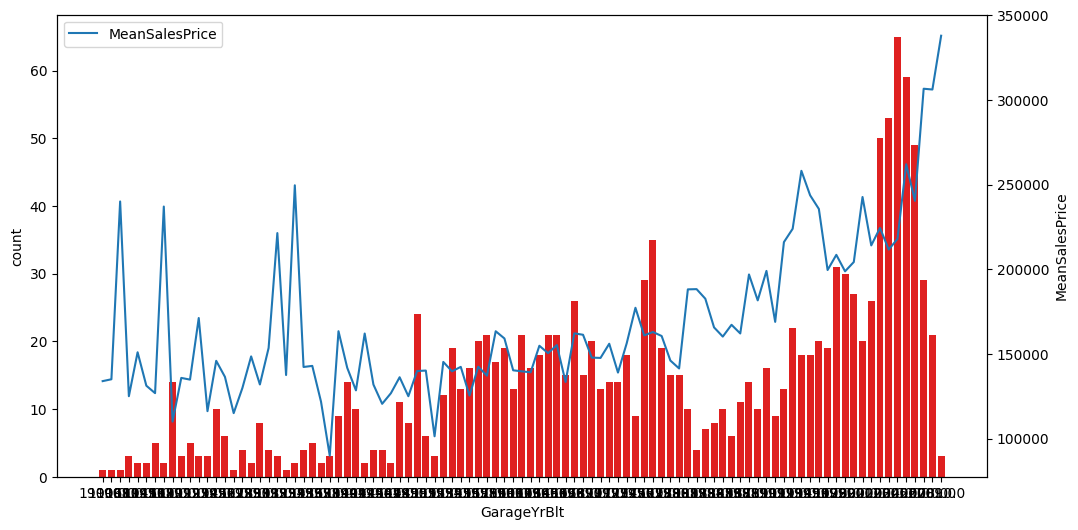

In [72]:
group = 'GarageYrBlt'
ordinal_plot(df, group)

Correlation with target variable: 0.48636167748786097


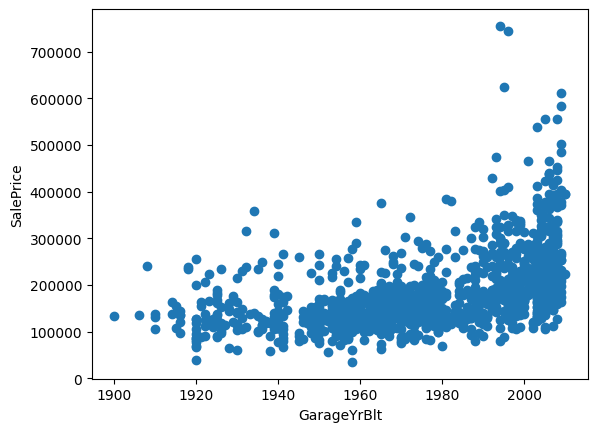

In [73]:
scatterplot(df, group, tgt)

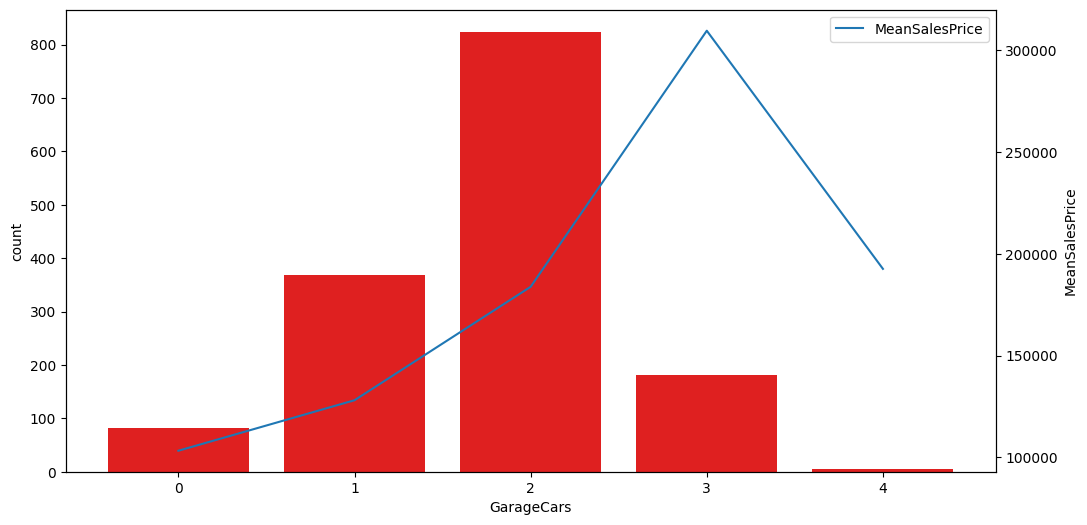

In [74]:
group = 'GarageCars'
ordinal_plot(df, group)

Correlation with target variable: 0.6404091972583521


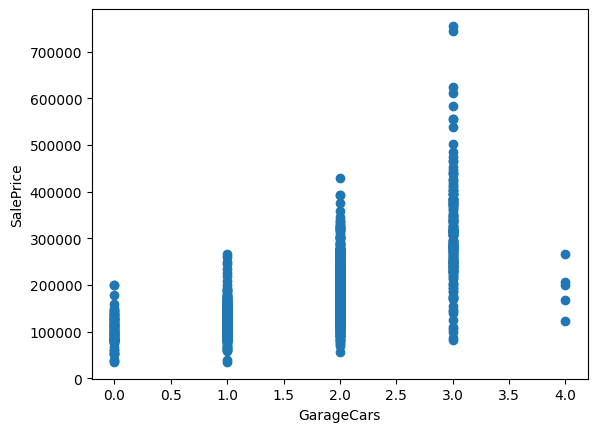

In [75]:
scatterplot(df, group, tgt)

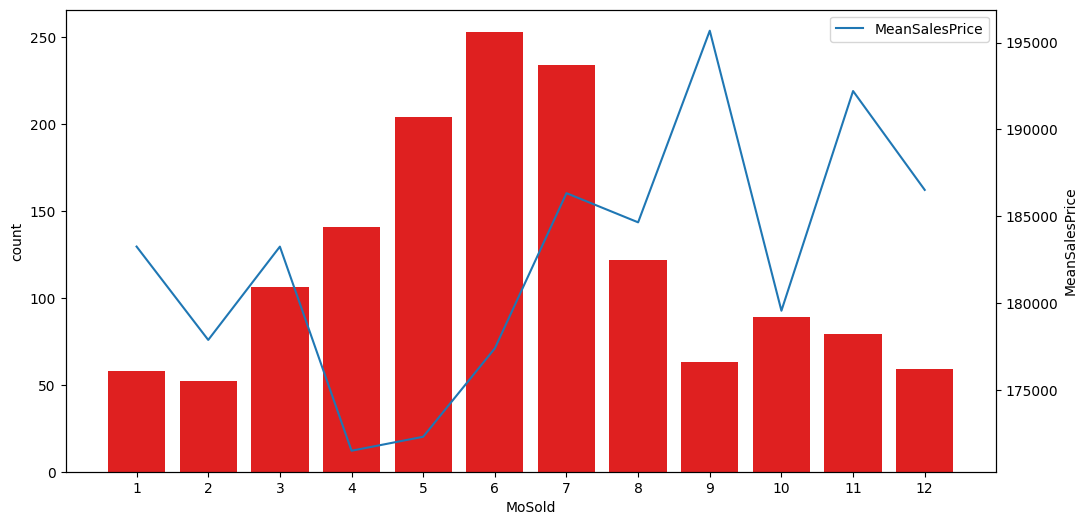

In [76]:
group = 'MoSold'
ordinal_plot(df, group)

Correlation with target variable: 0.04643224522381934


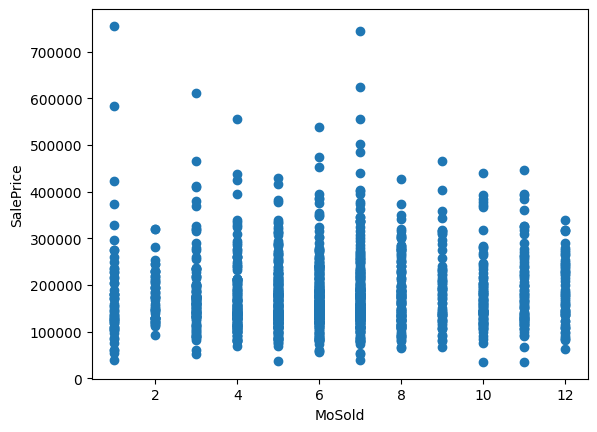

In [77]:
scatterplot(df, group, tgt)

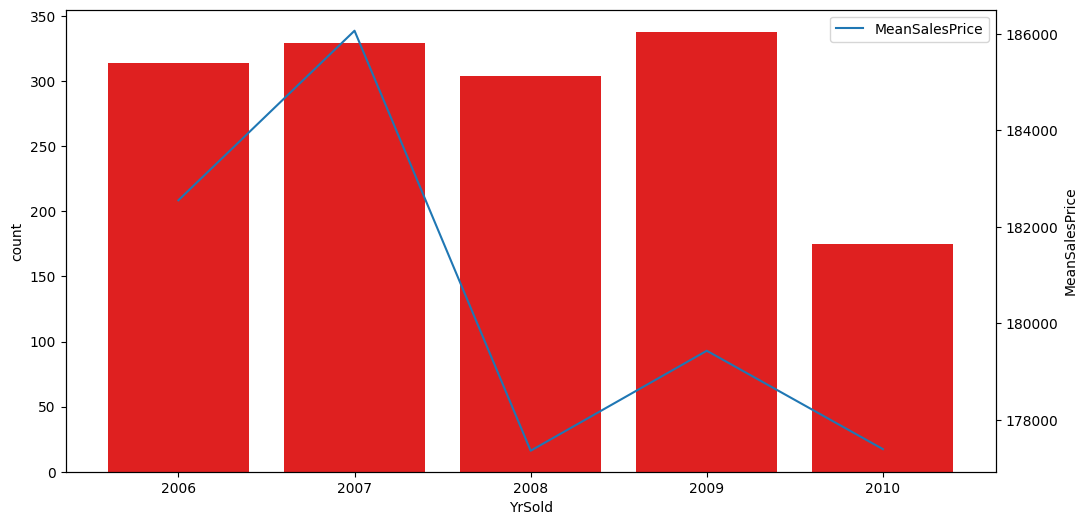

In [78]:
group = 'YrSold'
ordinal_plot(df, group)

Correlation with target variable: -0.028922585168730326


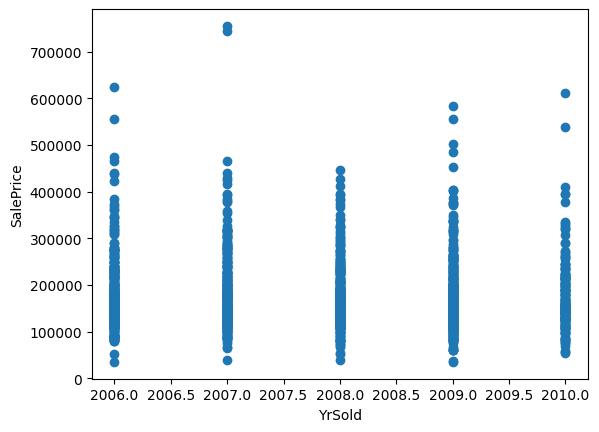

In [79]:
scatterplot(df, group, tgt)

# Categoricals

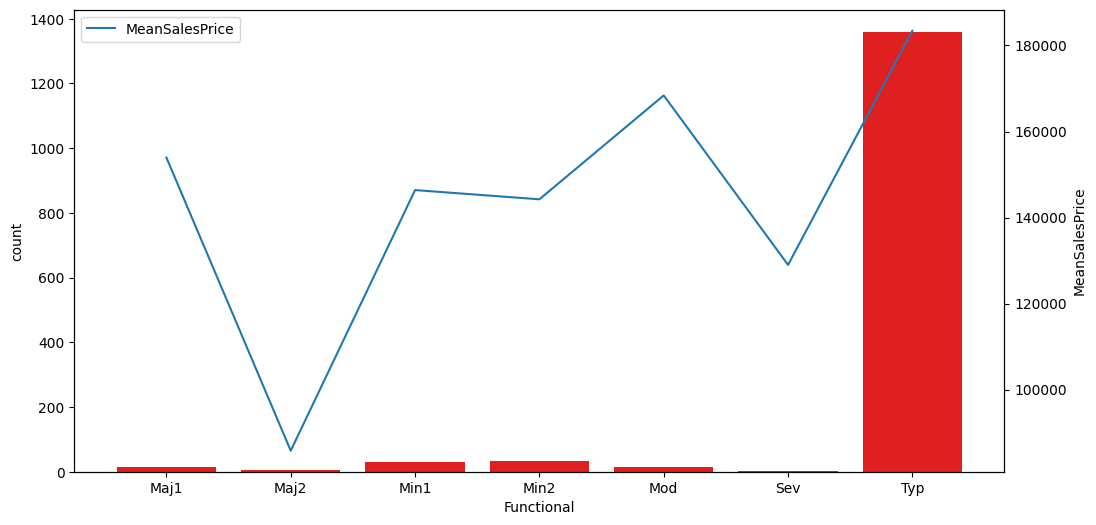

In [80]:
group = 'Functional'
categorical_plot(df, group)

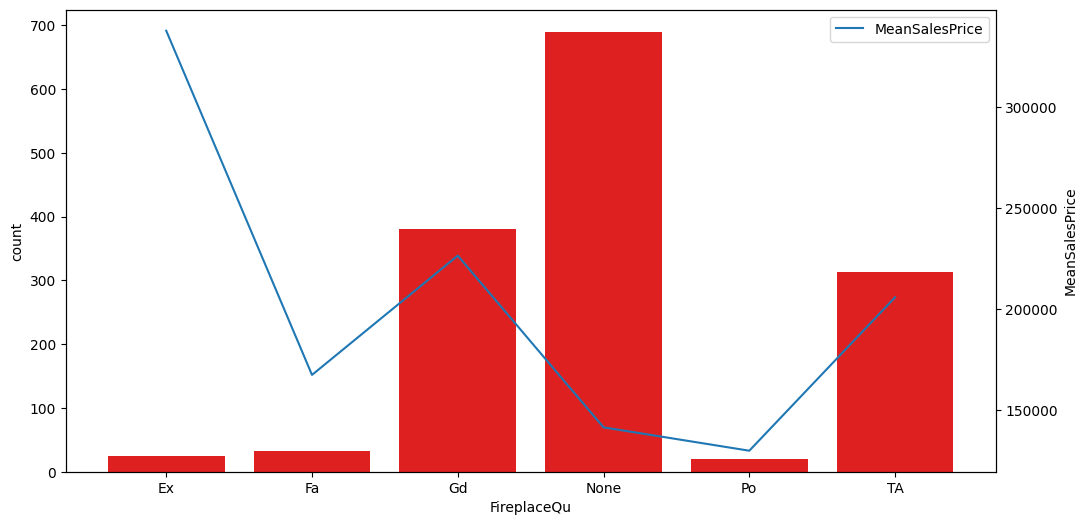

In [81]:
group = 'FireplaceQu'
categorical_plot(df, group)

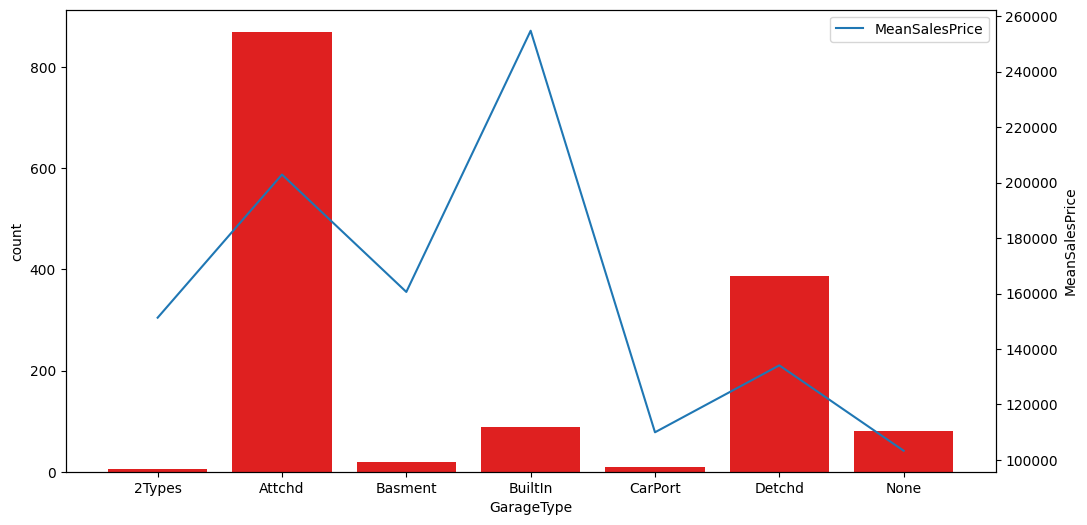

In [82]:
group = 'GarageType'
categorical_plot(df, group)

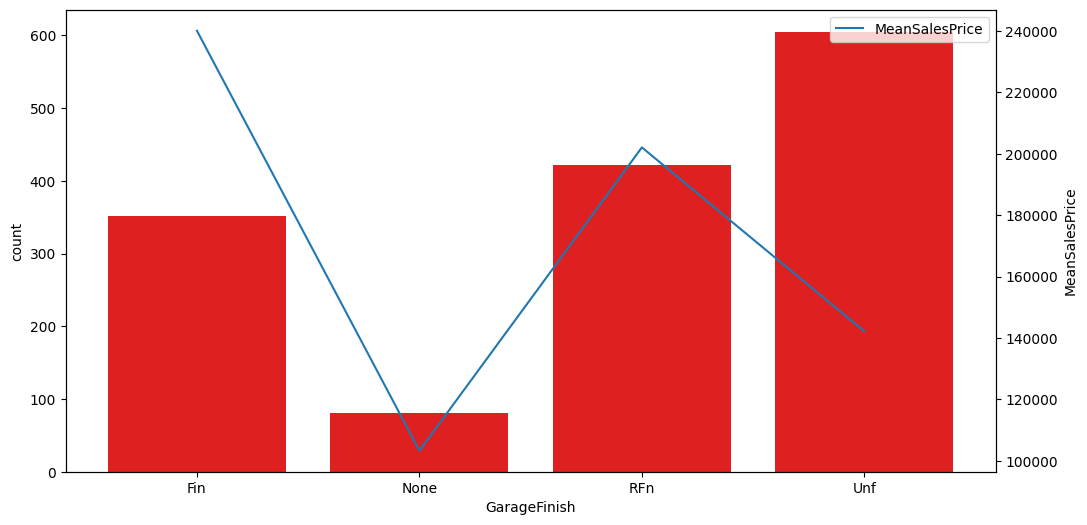

In [83]:
group = 'GarageFinish'
categorical_plot(df, group)

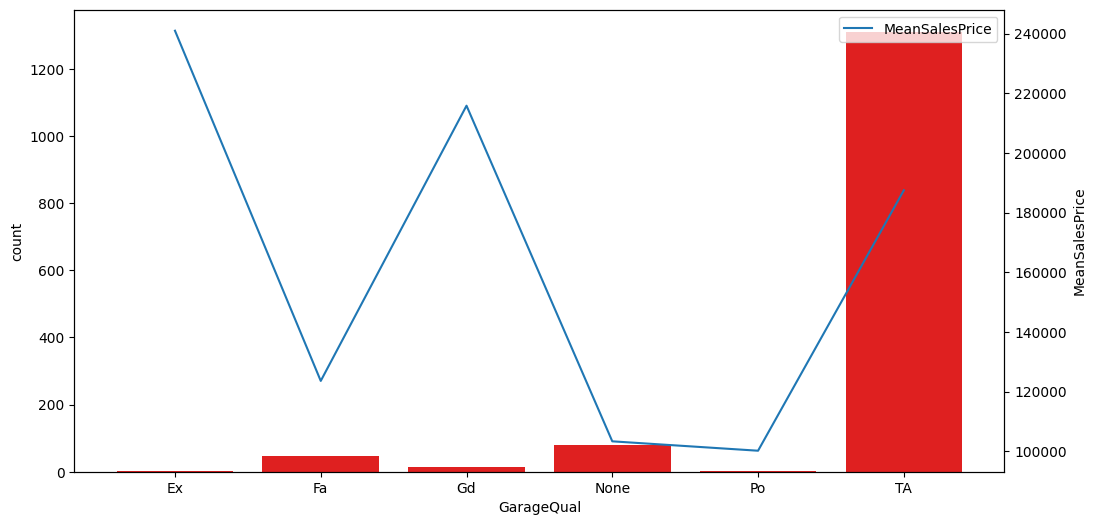

In [84]:
group = 'GarageQual'
categorical_plot(df, group)

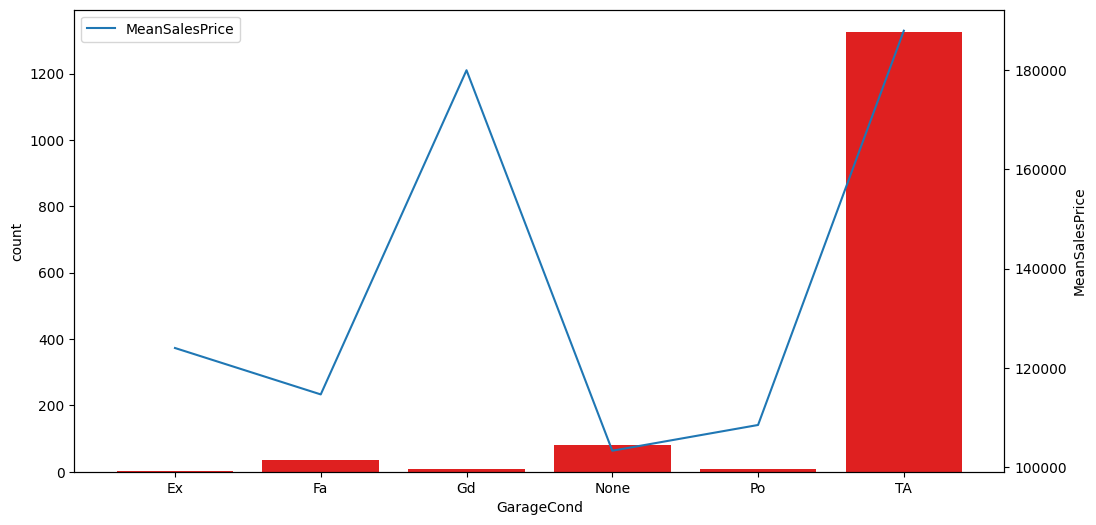

In [85]:
group = 'GarageCond'
categorical_plot(df, group)

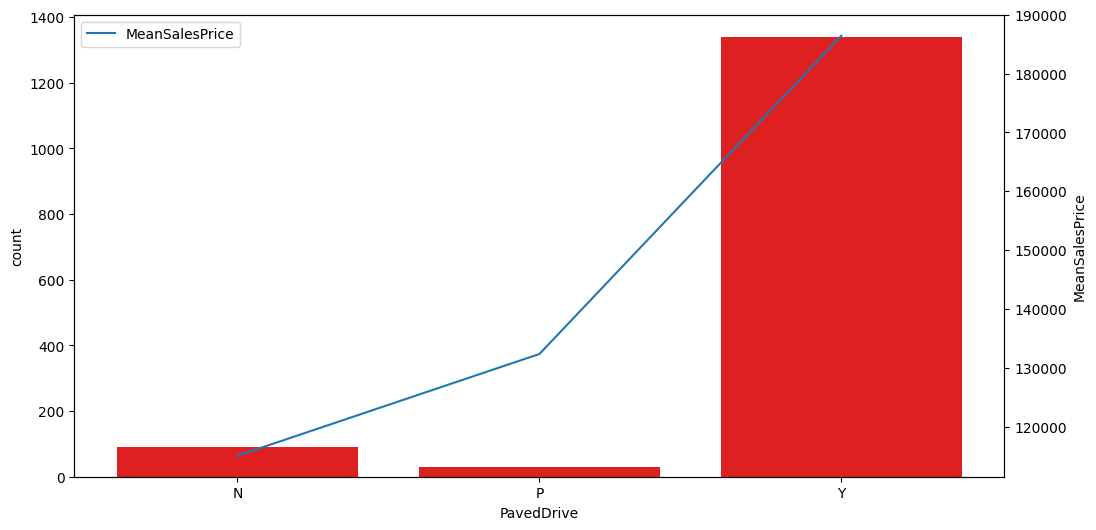

In [86]:
group = 'PavedDrive'
categorical_plot(df, group)

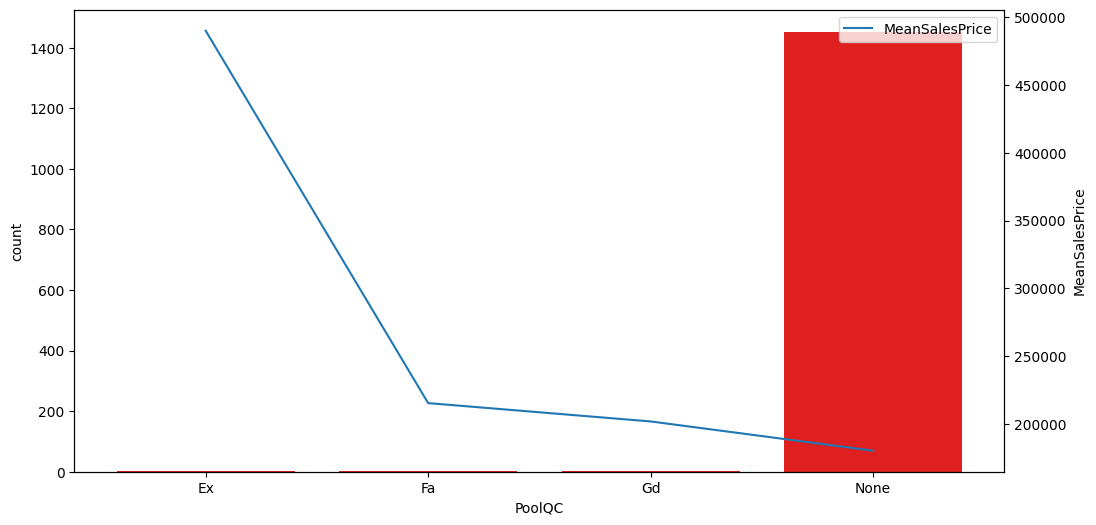

In [87]:
group = 'PoolQC'
categorical_plot(df, group)

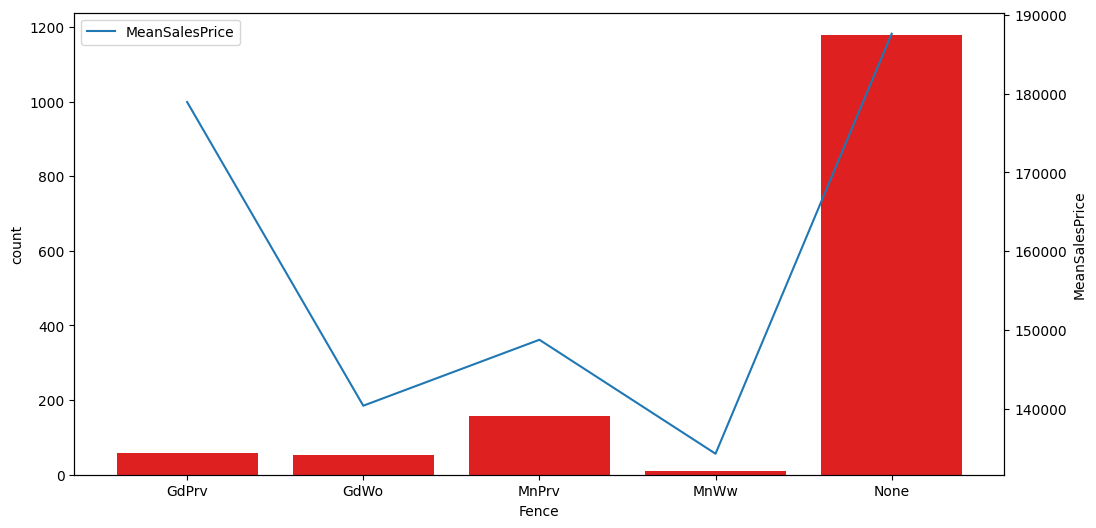

In [88]:
group = 'Fence'
categorical_plot(df, group)

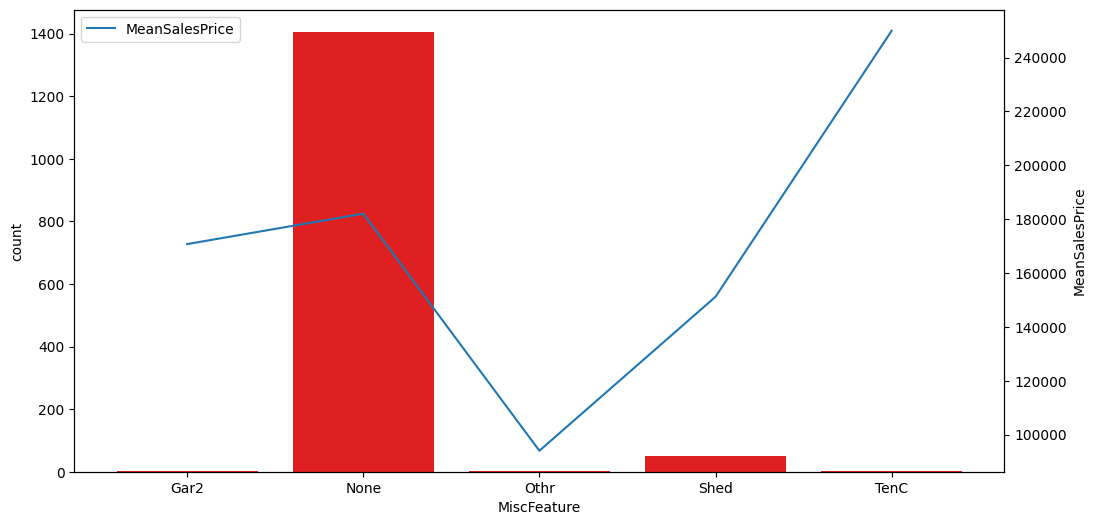

In [89]:
group = 'MiscFeature'
categorical_plot(df, group)

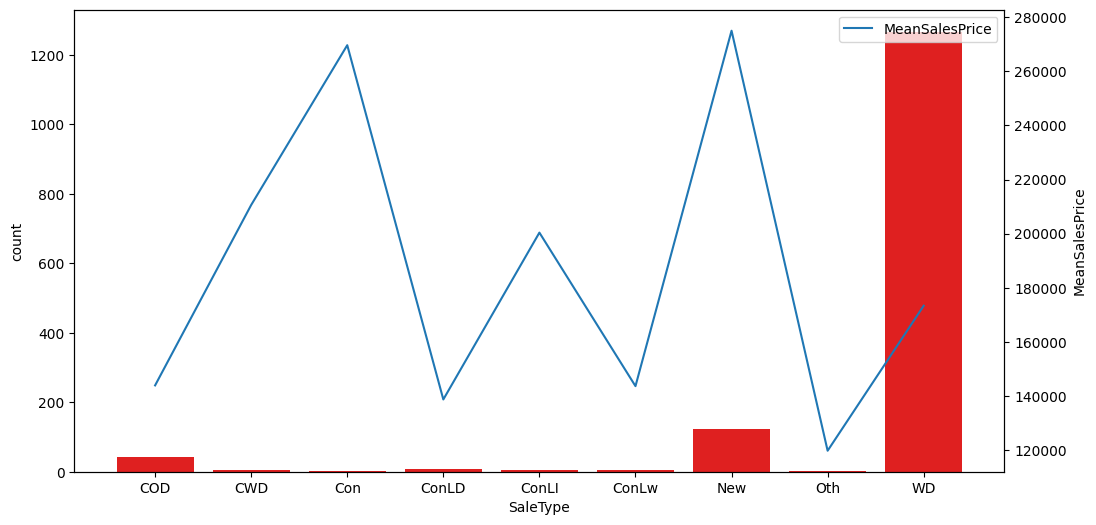

In [90]:
group = 'SaleType'
categorical_plot(df, group)

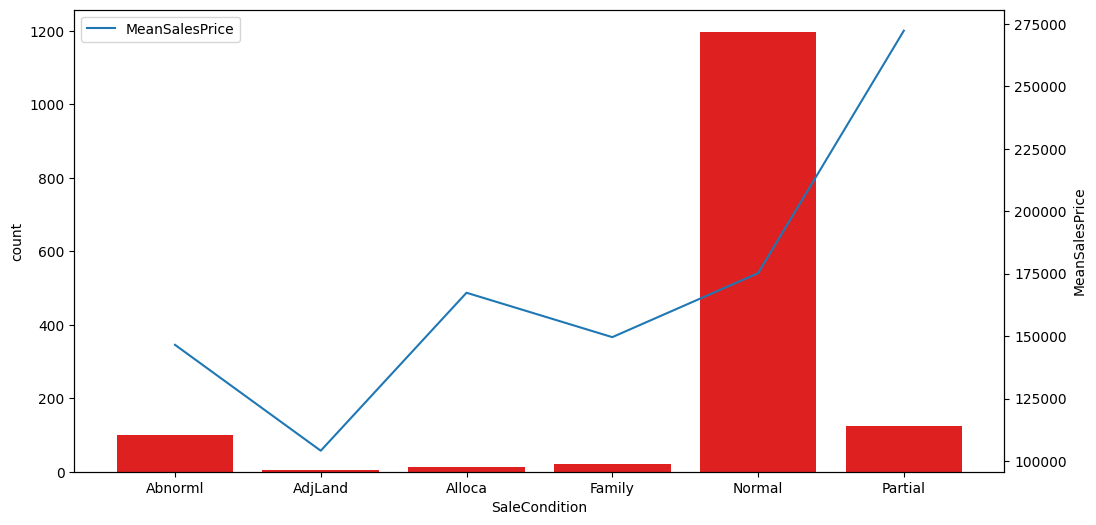

In [91]:
group = 'SaleCondition'
categorical_plot(df, group)

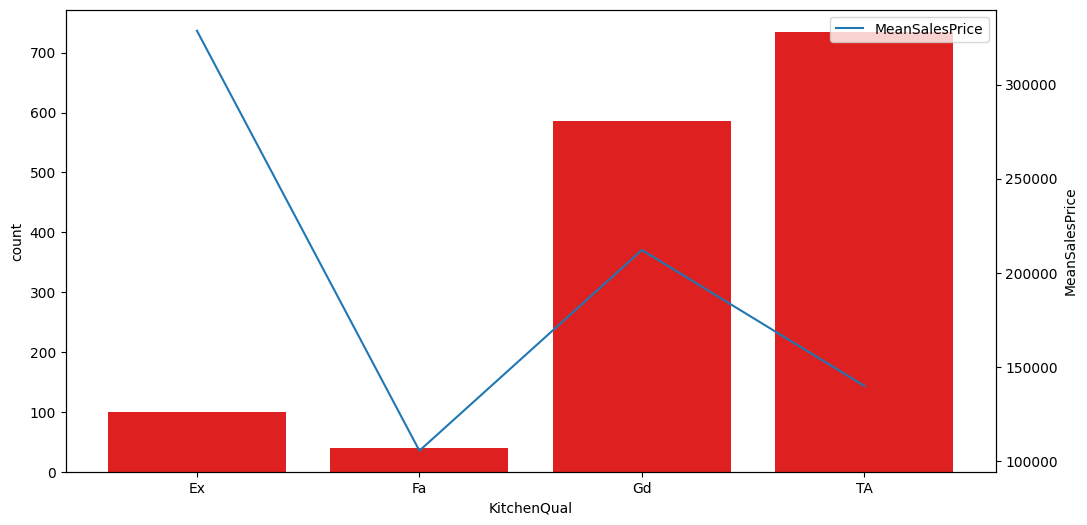

In [92]:
group = 'KitchenQual'
categorical_plot(df, group)

In [93]:
df.select_dtypes(include='object').columns

Index(['Id', 'YearRemodAdd'], dtype='object')

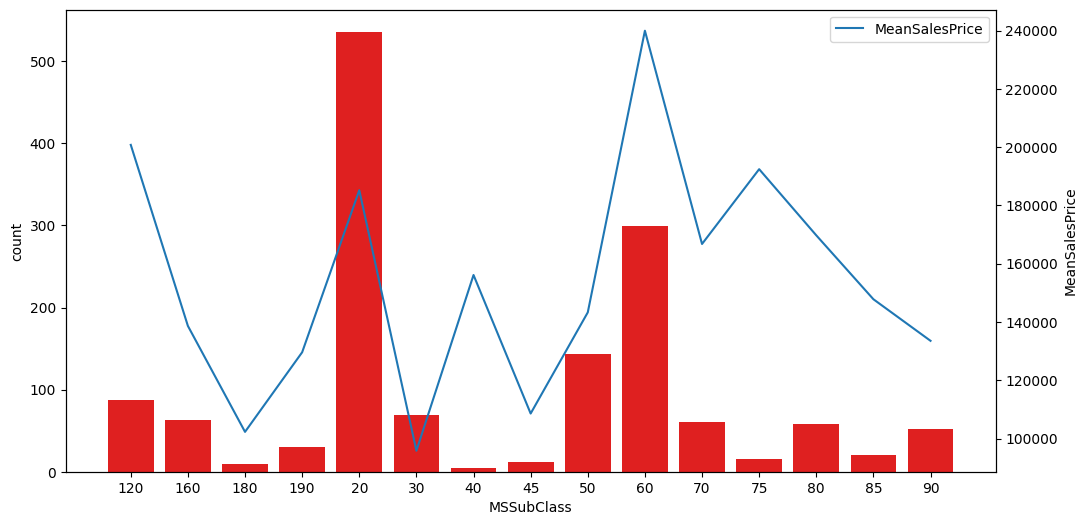

In [94]:
group = 'MSSubClass'
categorical_plot(df, group)

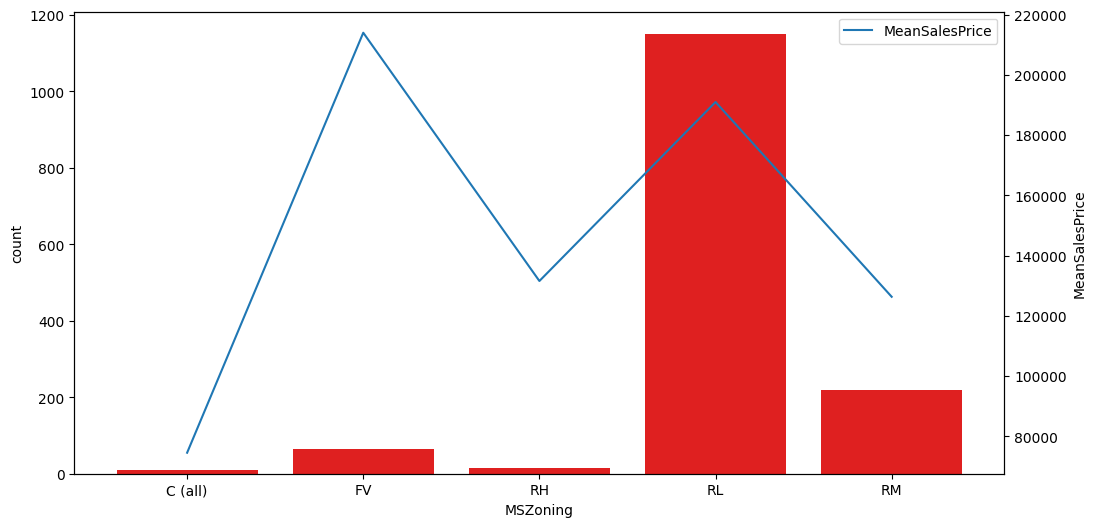

In [95]:
group = 'MSZoning'
categorical_plot(df, group)

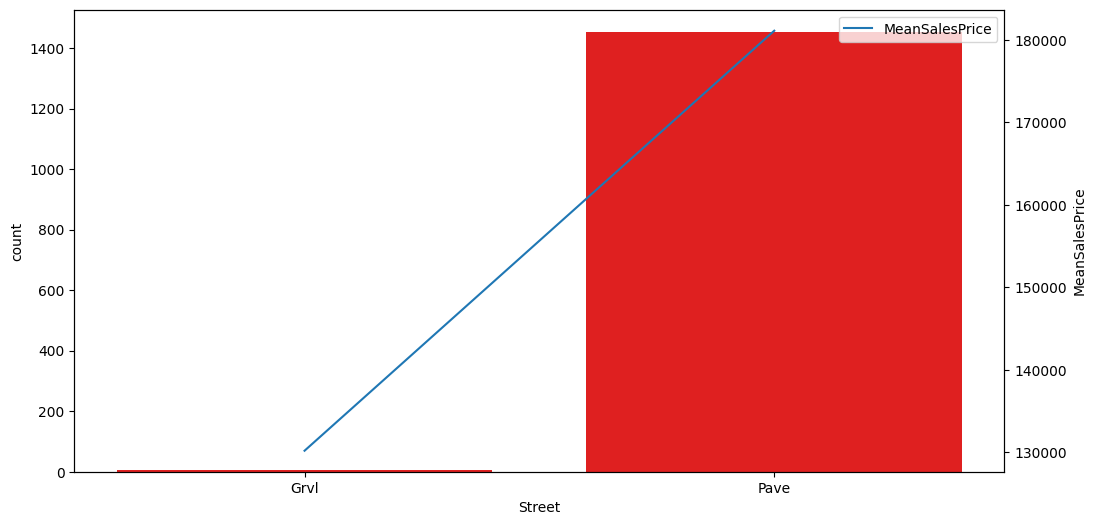

In [96]:
group = 'Street'
categorical_plot(df, group)

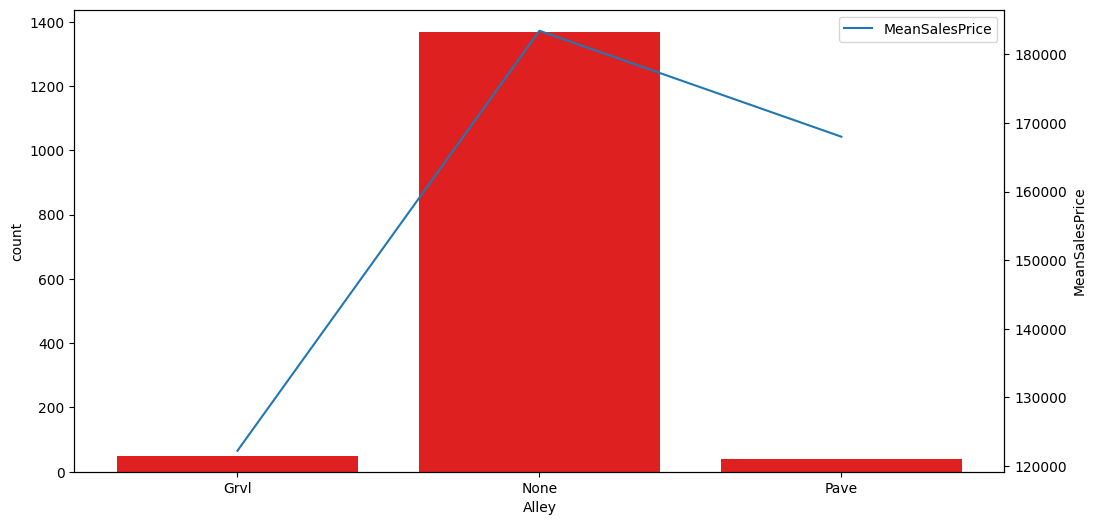

In [97]:
group = 'Alley'
categorical_plot(df, group)

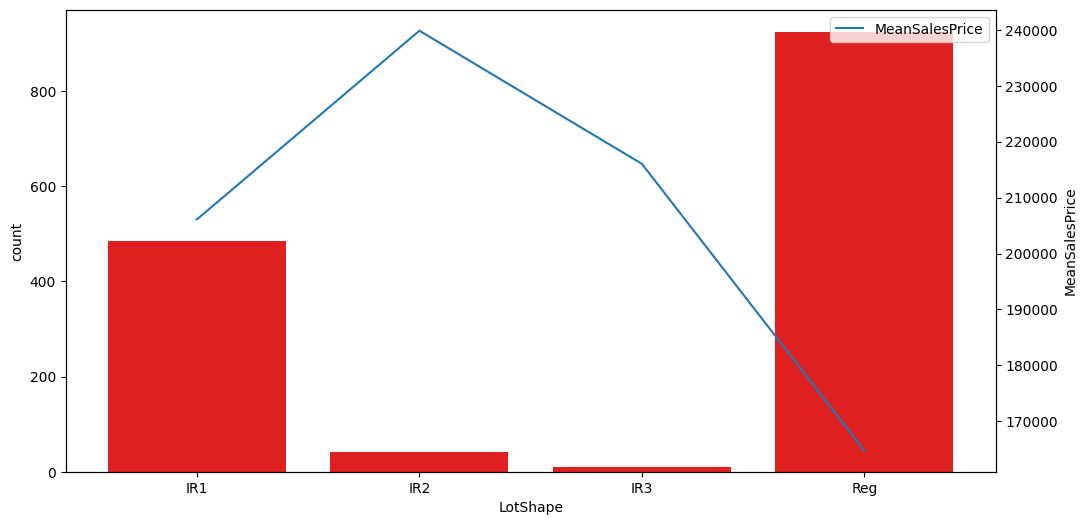

In [98]:
group = 'LotShape'
categorical_plot(df, group)

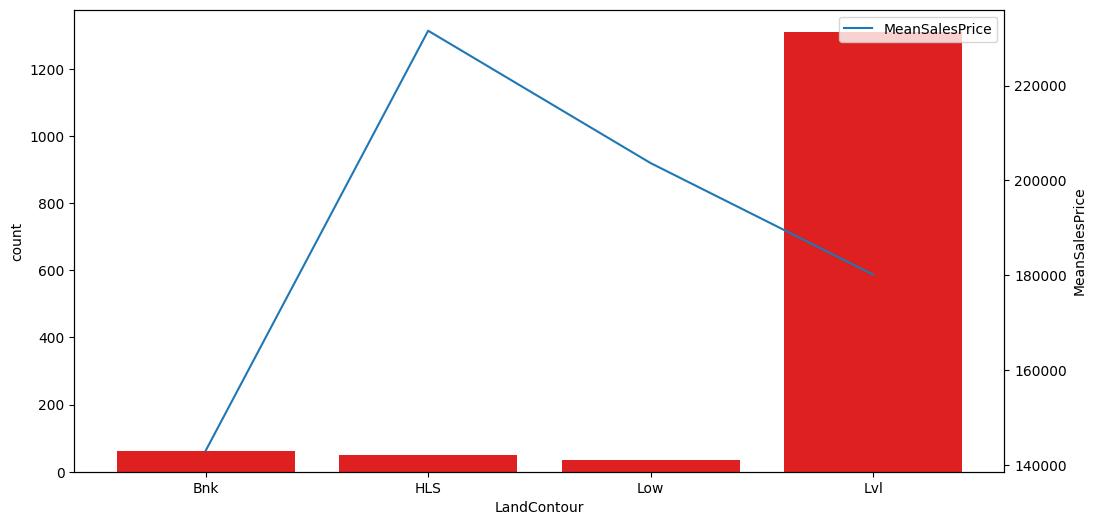

In [99]:
group = 'LandContour'
categorical_plot(df, group)

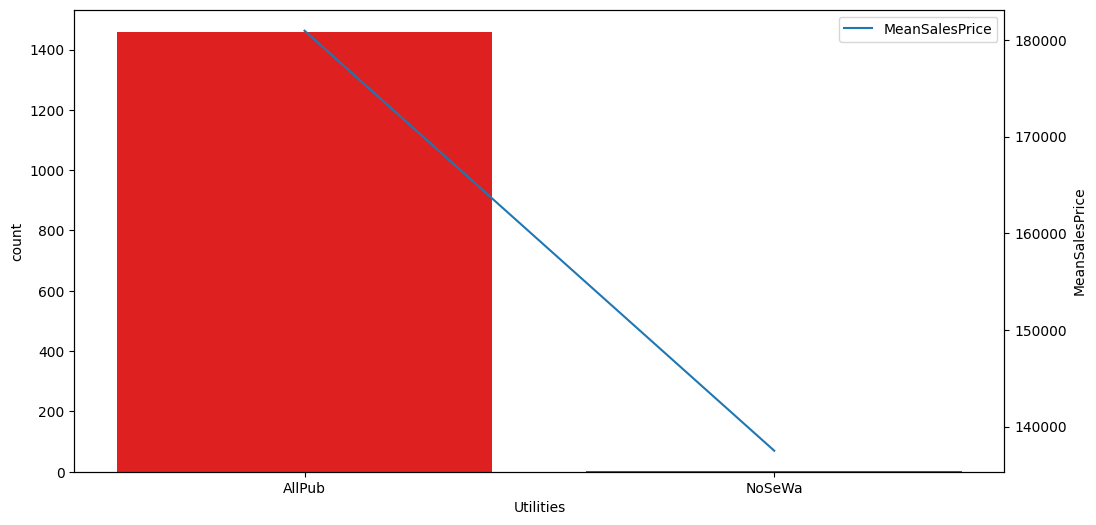

In [100]:
group = 'Utilities'
categorical_plot(df, group)

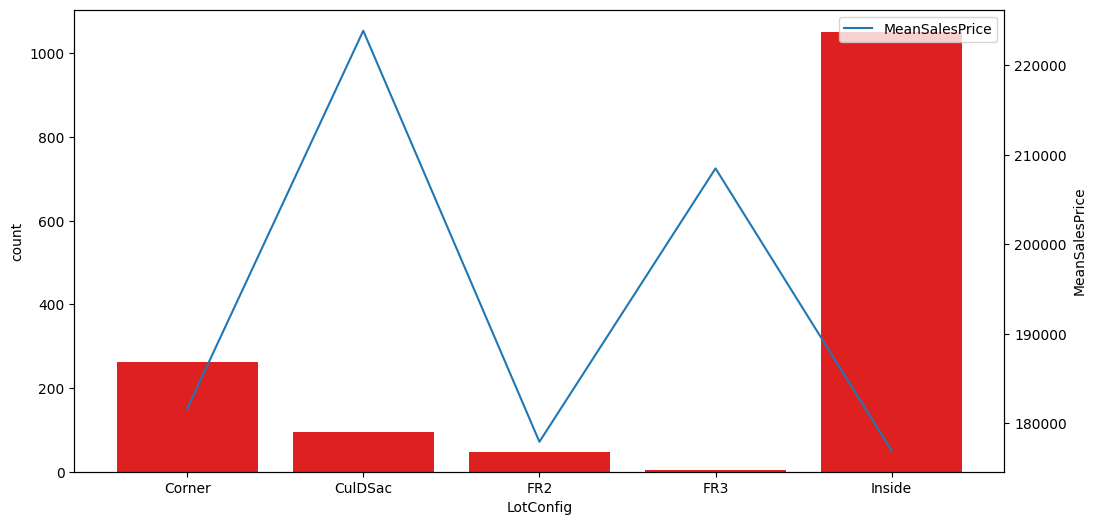

In [101]:
group = 'LotConfig'
categorical_plot(df, group)

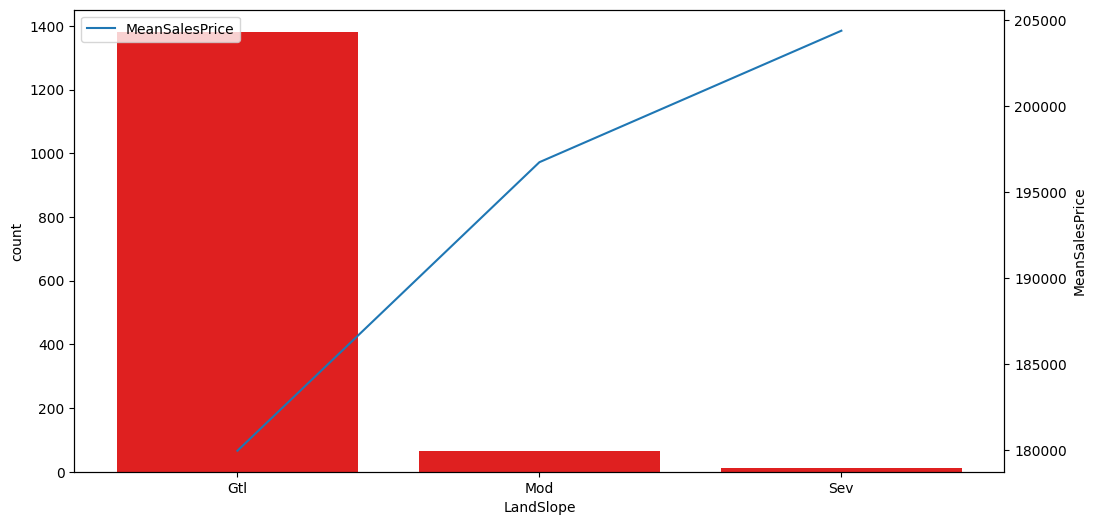

In [102]:
group = 'LandSlope'
categorical_plot(df, group)

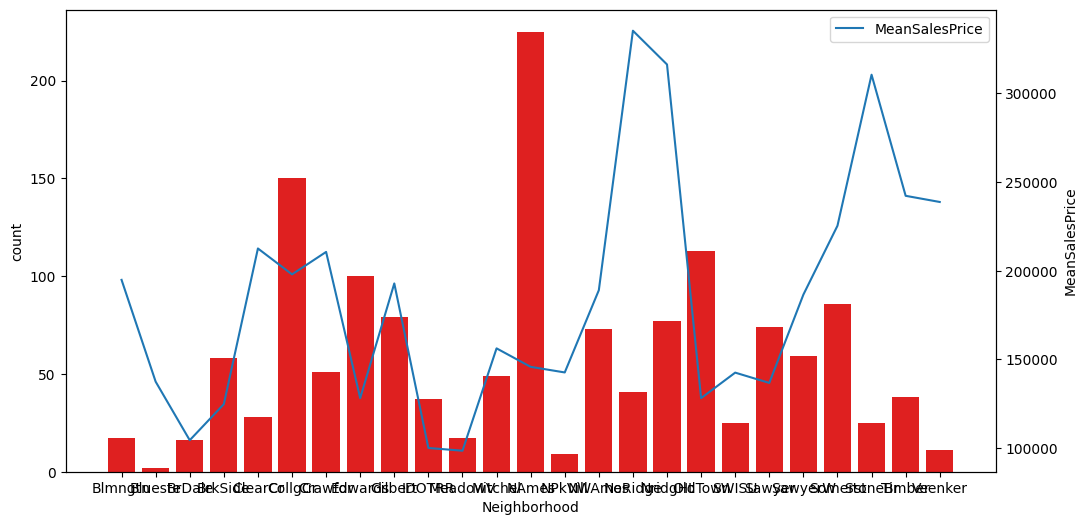

In [103]:
group = 'Neighborhood'
categorical_plot(df, group)

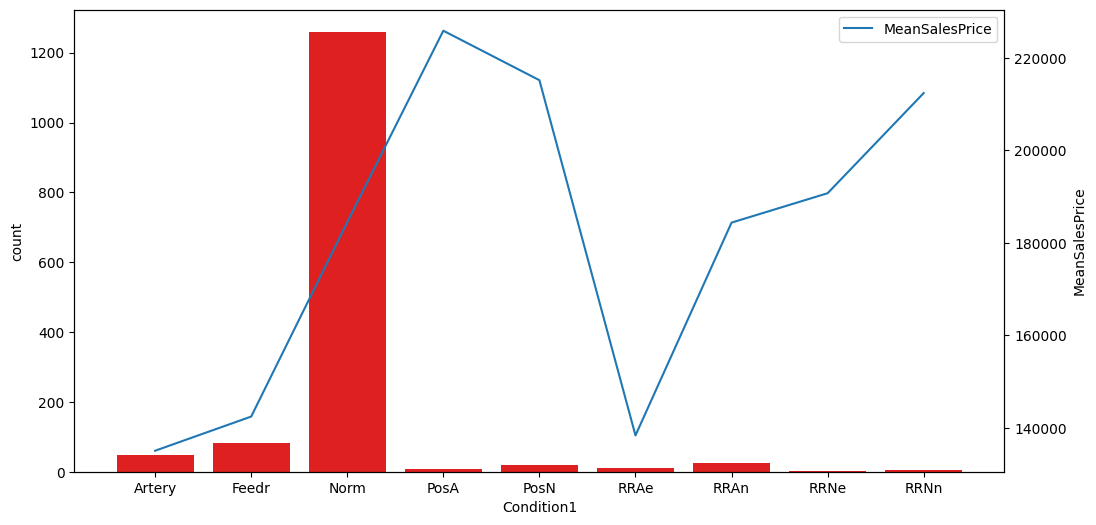

In [104]:
group = 'Condition1'
categorical_plot(df, group)

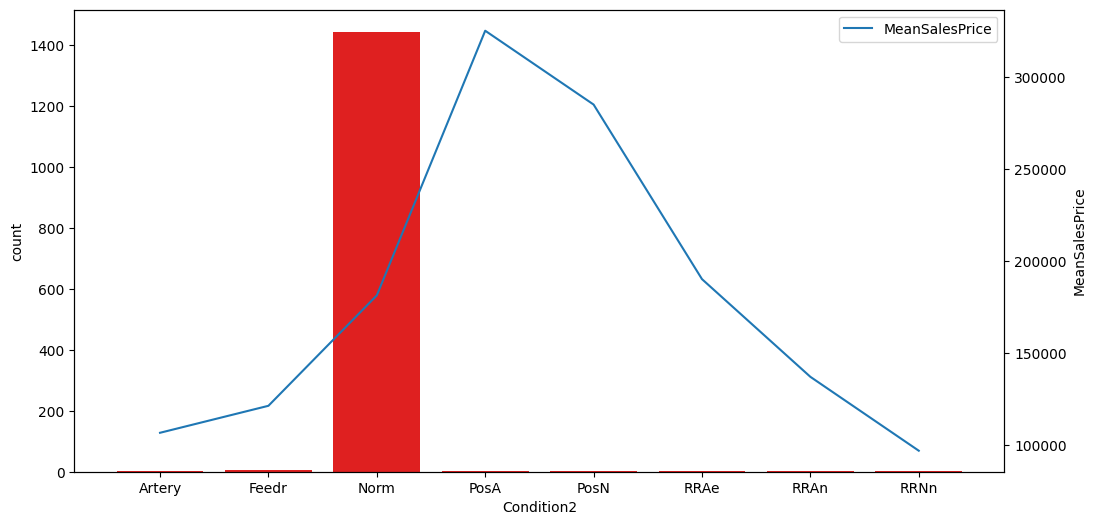

In [105]:
group = 'Condition2'
categorical_plot(df, group)

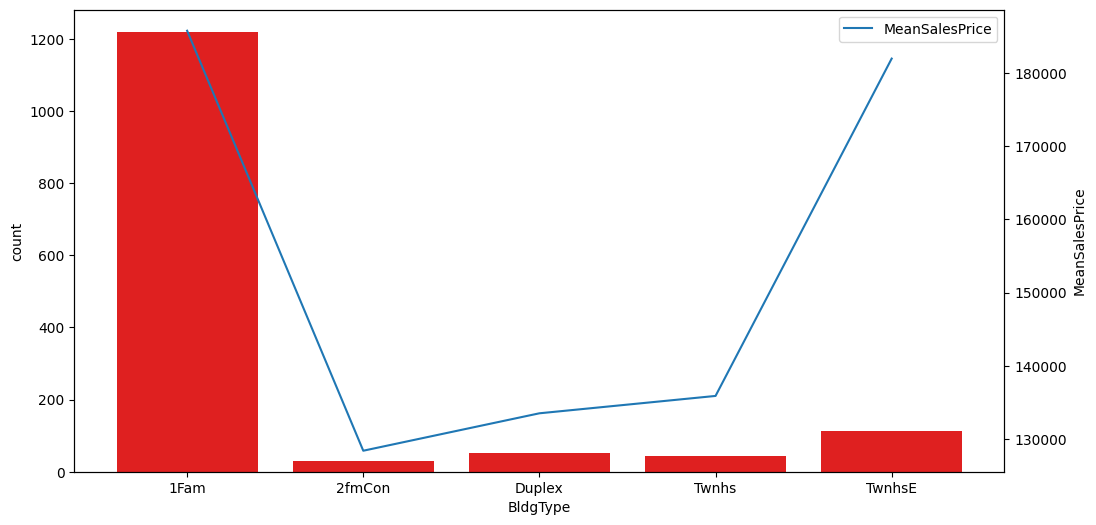

In [106]:
group = 'BldgType'
categorical_plot(df, group)

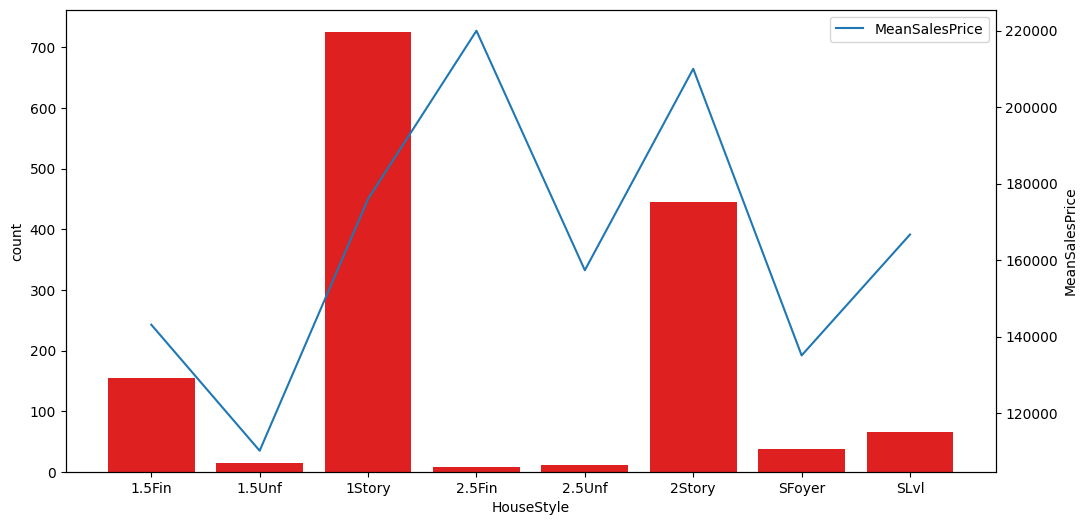

In [107]:
group = 'HouseStyle'
categorical_plot(df, group)

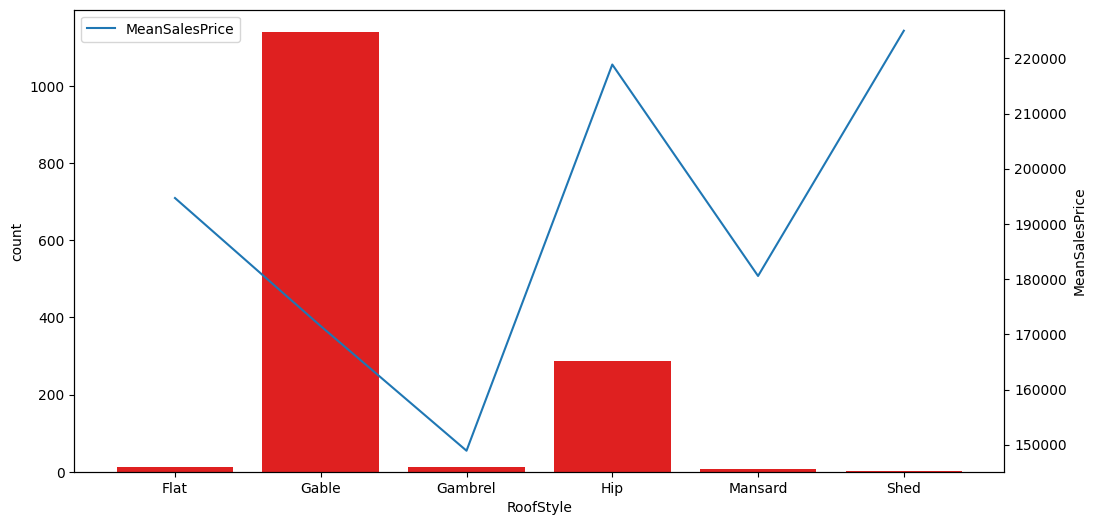

In [108]:
group = 'RoofStyle'
categorical_plot(df, group)

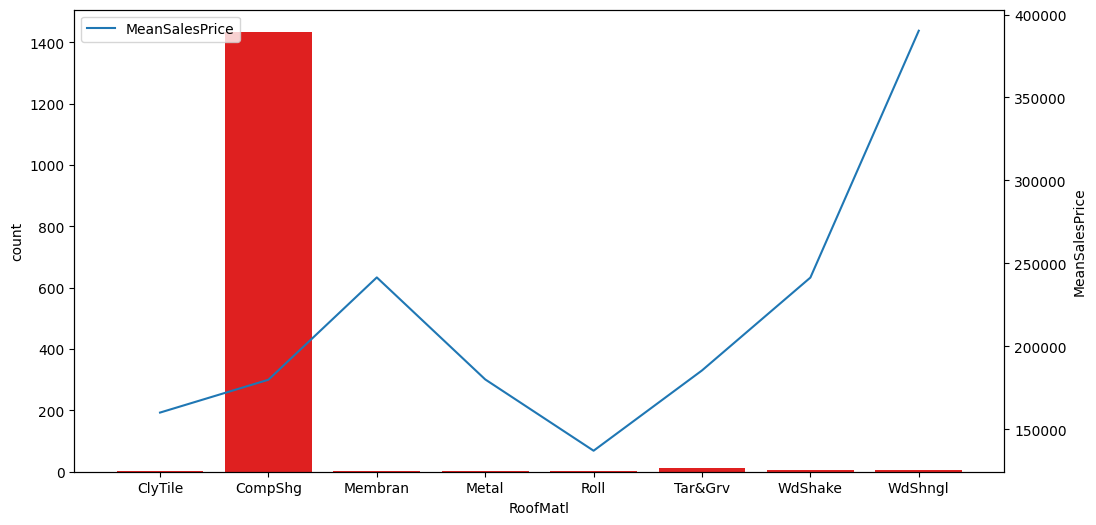

In [109]:
group = 'RoofMatl'
categorical_plot(df, group)

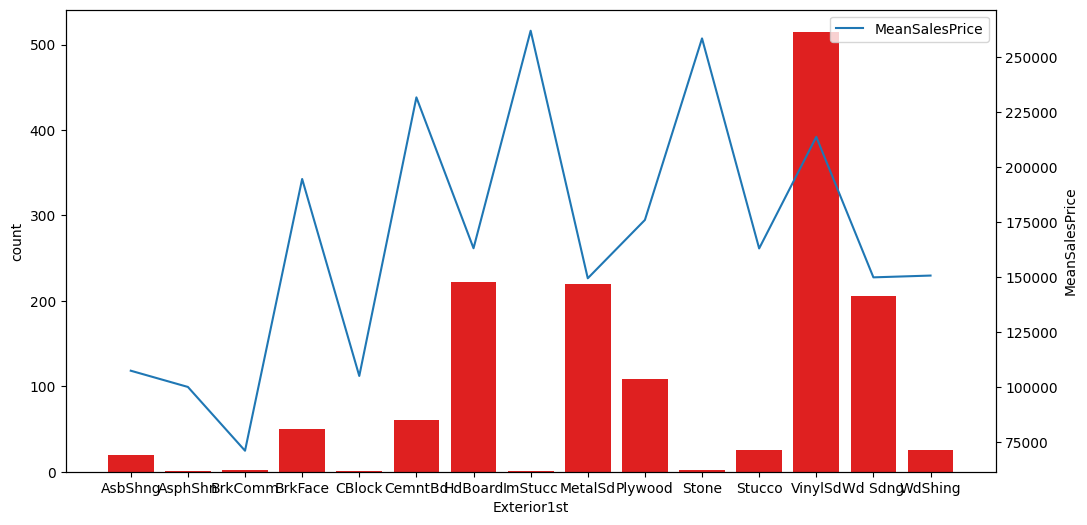

In [110]:
group = 'Exterior1st'
categorical_plot(df, group)

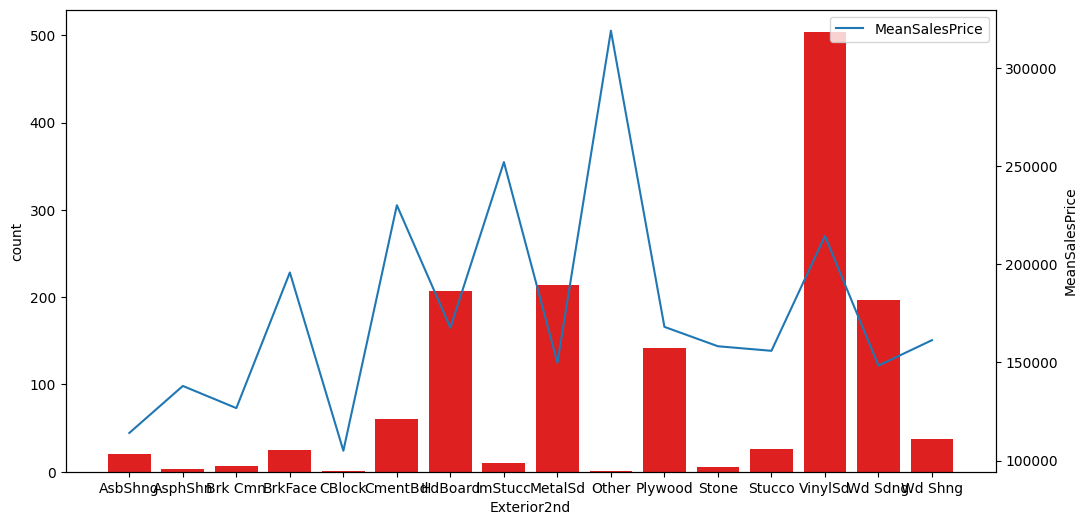

In [111]:
group = 'Exterior2nd'
categorical_plot(df, group)

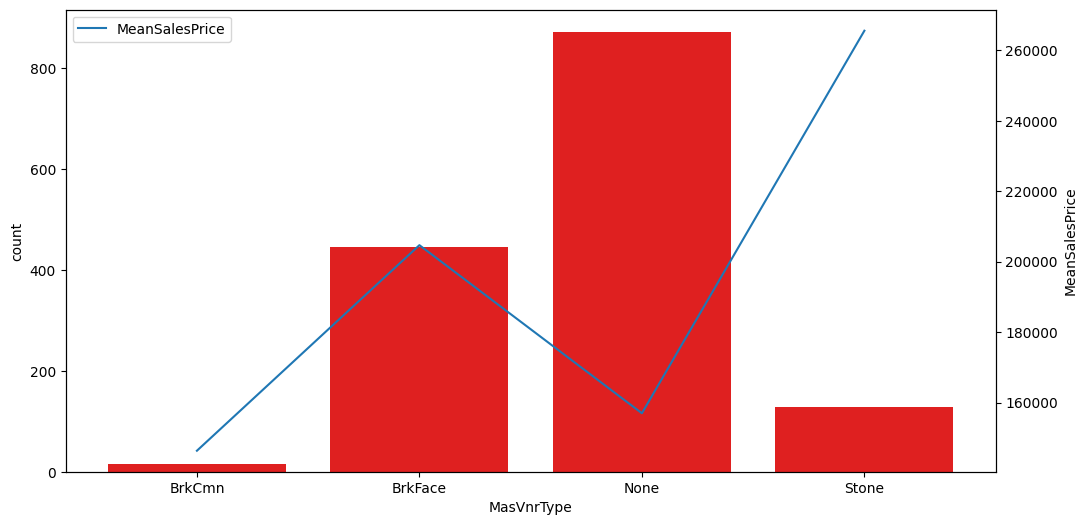

In [112]:
group = 'MasVnrType'
categorical_plot(df, group)

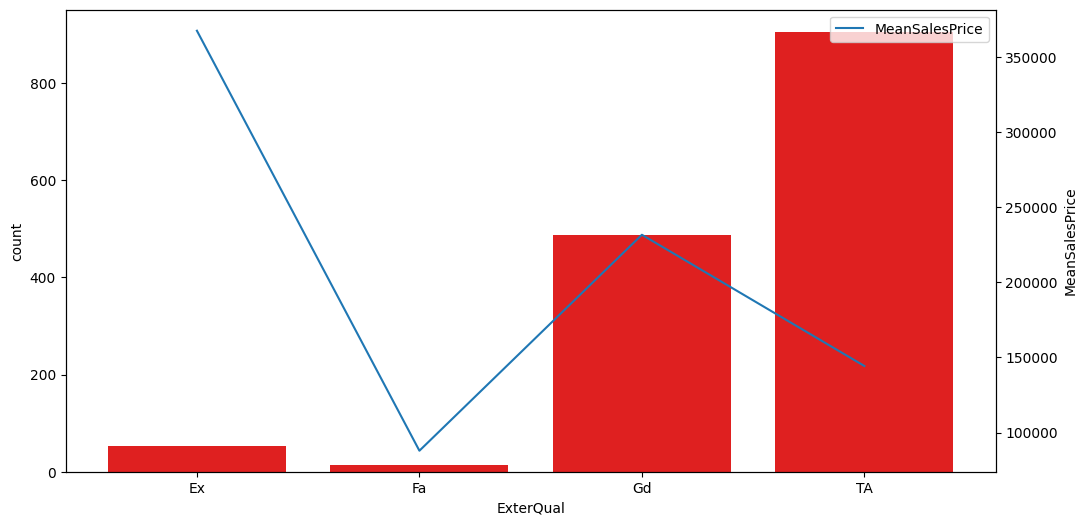

In [113]:
group = 'ExterQual'
categorical_plot(df, group)

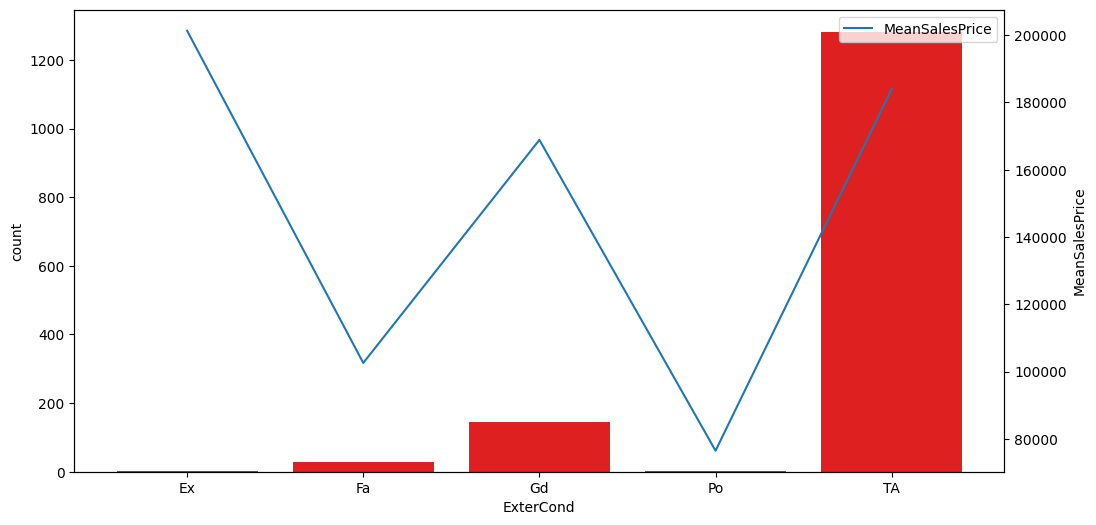

In [114]:
group = 'ExterCond'
categorical_plot(df, group)

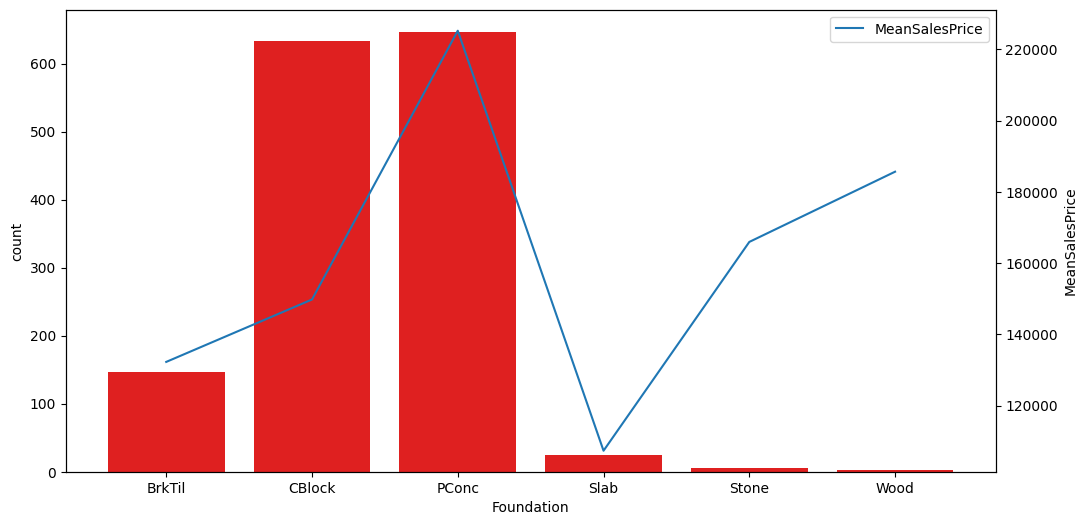

In [115]:
group = 'Foundation'
categorical_plot(df, group)

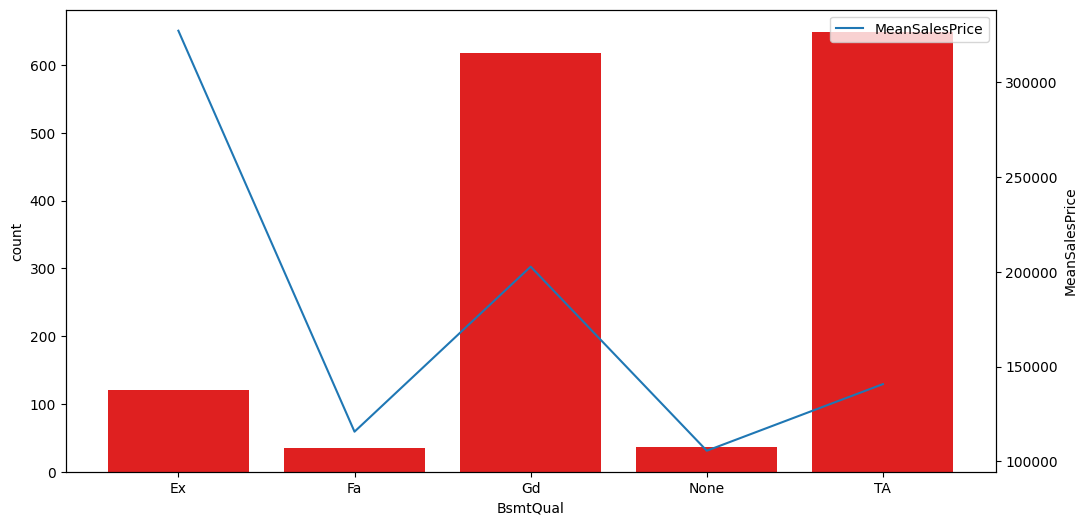

In [116]:
group = 'BsmtQual'
categorical_plot(df, group)

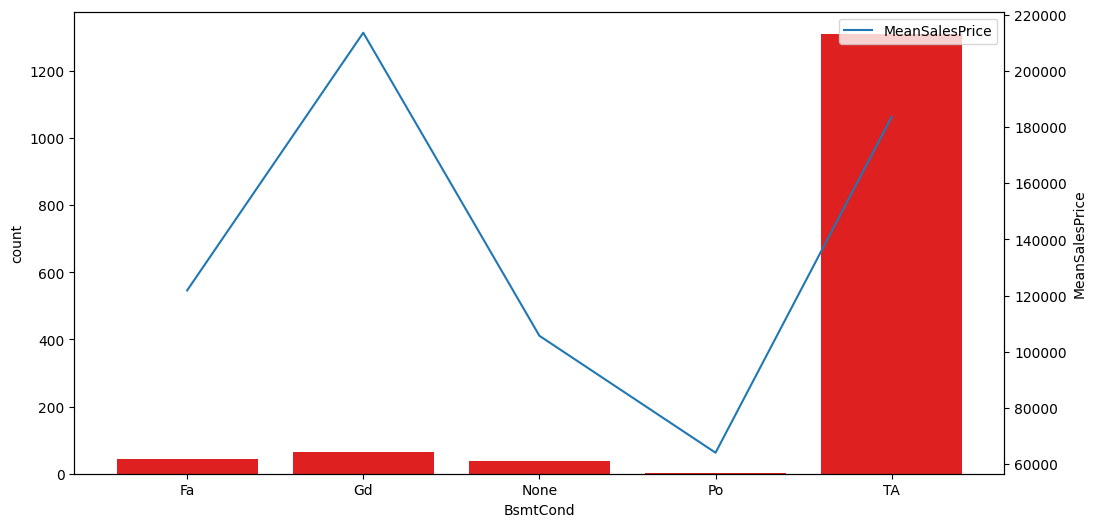

In [117]:
group = 'BsmtCond'
categorical_plot(df, group)

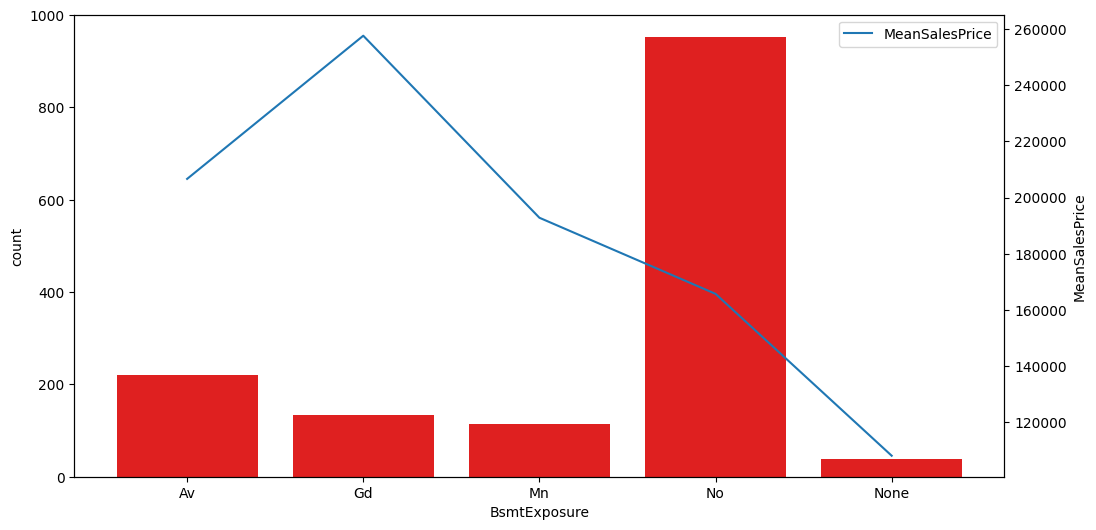

In [118]:
group = 'BsmtExposure'
categorical_plot(df, group)

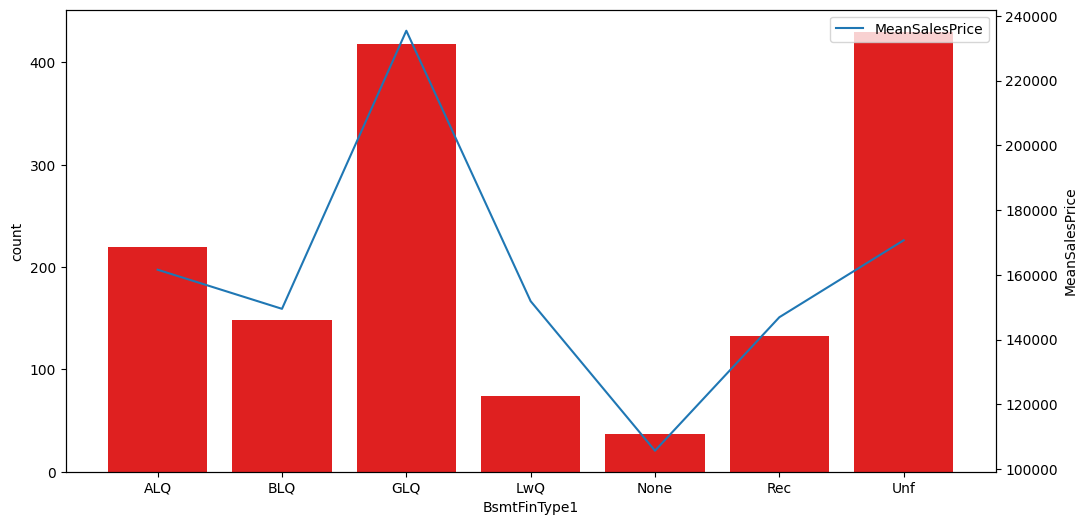

In [119]:
group = 'BsmtFinType1'
categorical_plot(df, group)

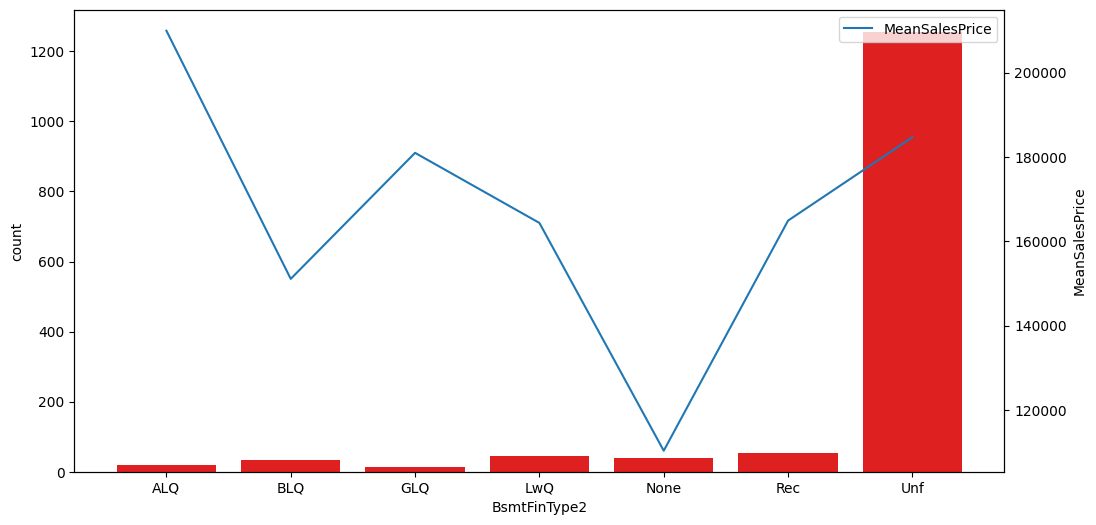

In [120]:
group = 'BsmtFinType2'
categorical_plot(df, group)

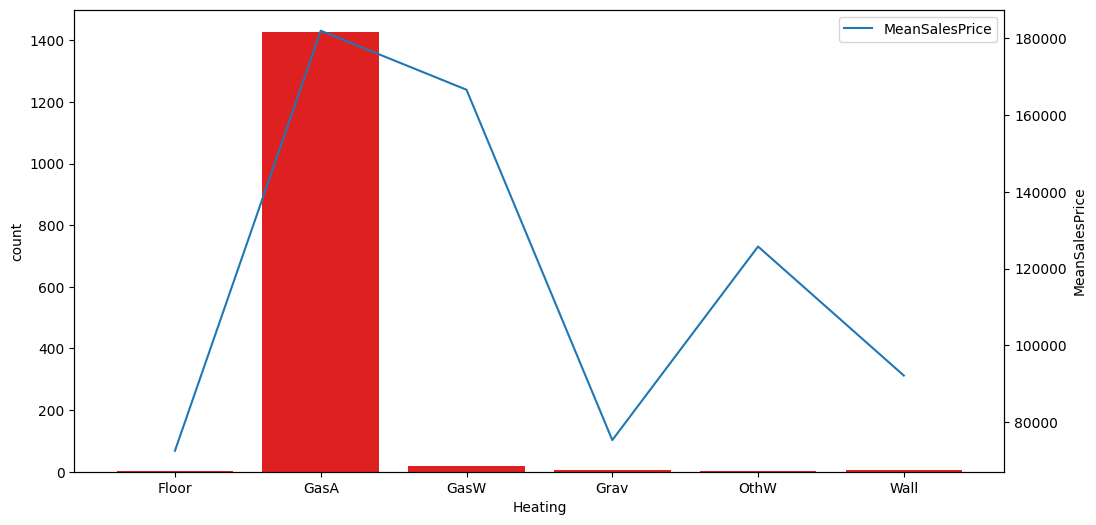

In [121]:
group = 'Heating'
categorical_plot(df, group)

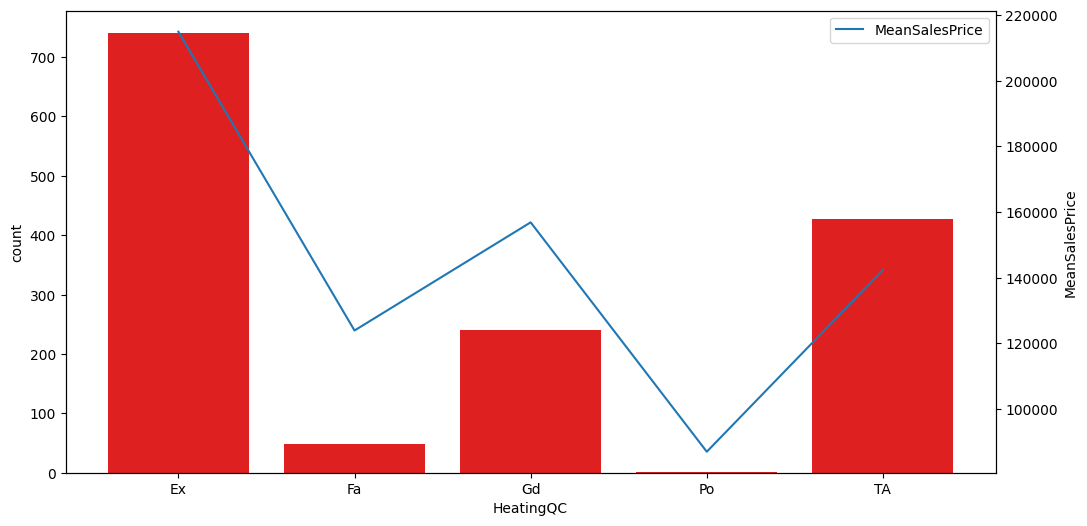

In [122]:
group = 'HeatingQC'
categorical_plot(df, group)

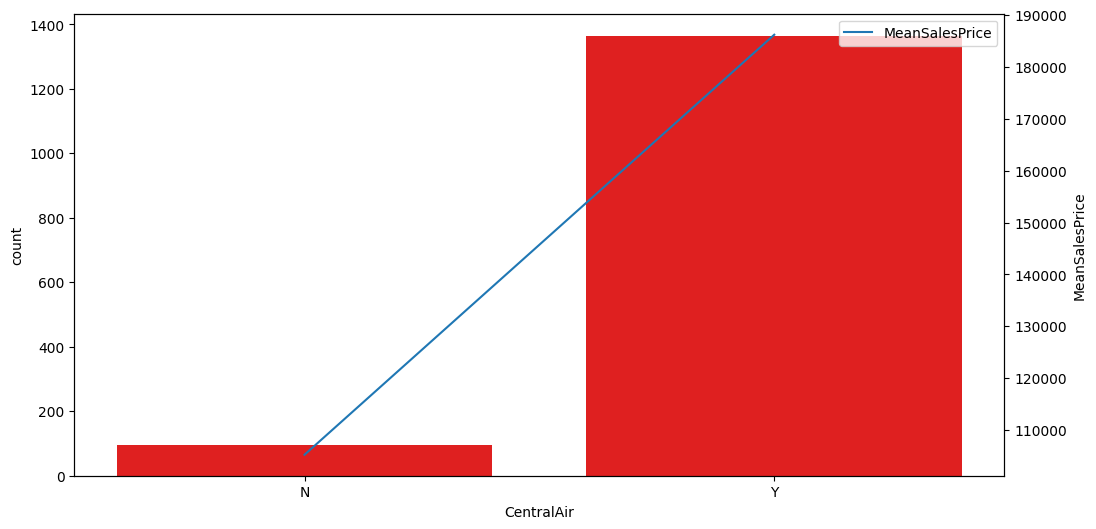

In [123]:
group = 'CentralAir'
categorical_plot(df, group)

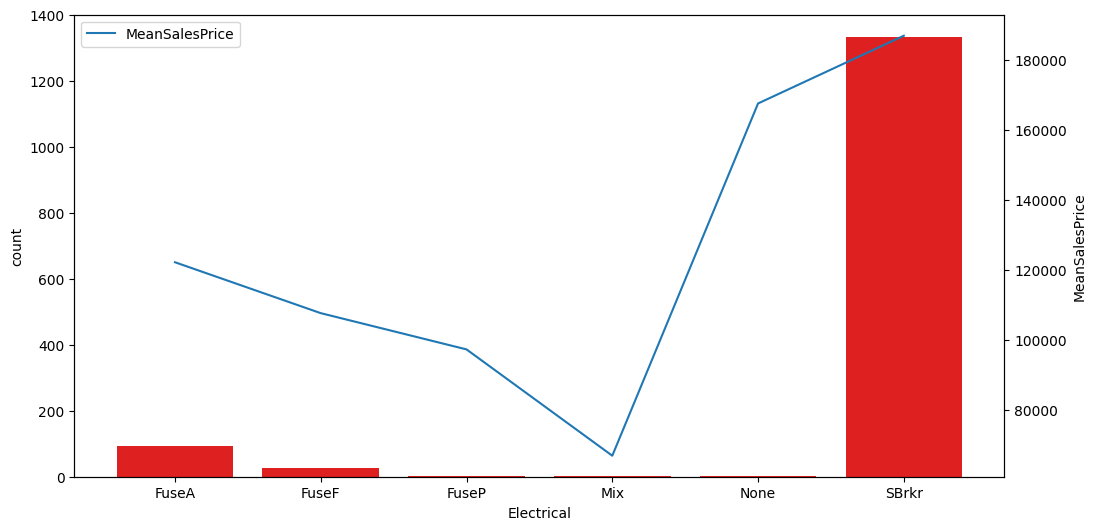

In [124]:
group = 'Electrical'
categorical_plot(df, group)